<a href="https://colab.research.google.com/github/Liam876/t-SNE_Project/blob/main/notebooks/Main_Notebook_for_Data_Exploration_and_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from sklearn import datasets, manifold
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import pickle

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#Circles

Checking for perplexity

circles, perplexity=5 in 2.4 sec
circles, perplexity=30 in 1.7 sec
circles, perplexity=50 in 2.2 sec
circles, perplexity=80 in 1.7 sec


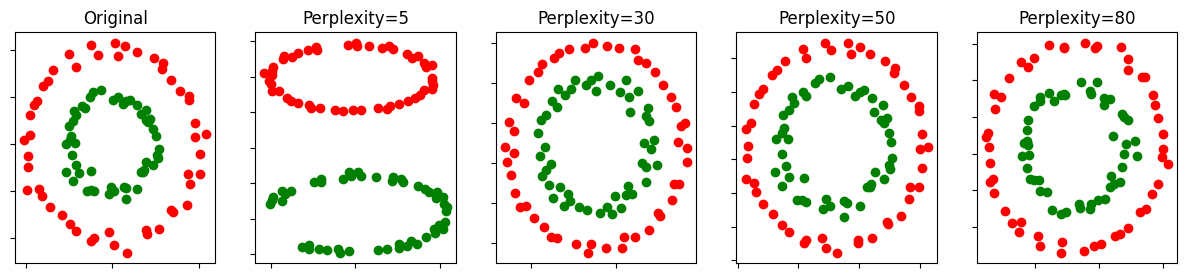

In [ ]:
n_samples = 100
n_components = 2
random_state = 32
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 3))
perplexities = [5, 30, 50, 80]
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_title("Original")
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=random_state,
        perplexity=perplexity,
        n_iter=2000,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

We will choose perplexity = 30 for the sake of variation in results<br>
Checked for large number of iterations so it's safe to assume convergence

[]

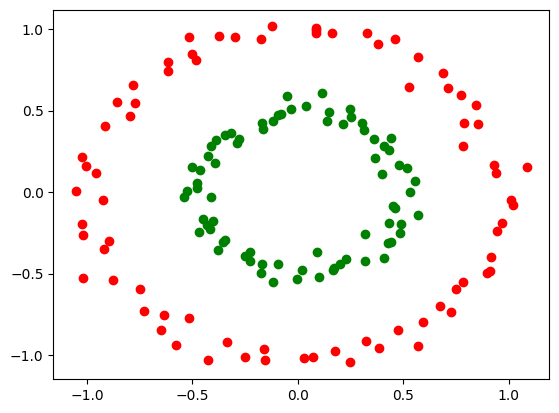

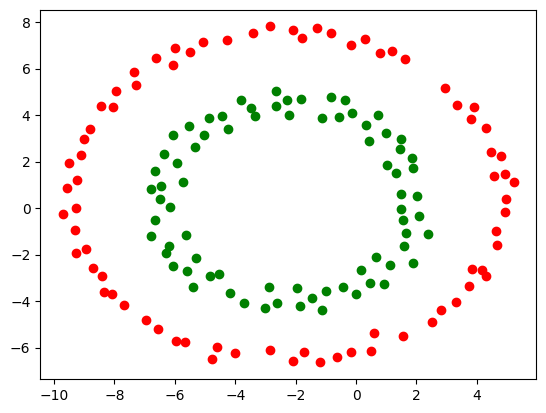

In [ ]:
n_samples = 150
n_components = 2
random_state = 32

X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[green, 0], X[green, 1], c="g")
#plt.title("Original")
plt.axis("tight")
plt.plot()
tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=random_state,
        perplexity=30
    )

Y = tsne.fit_transform(X)
#plt.set_title("Perplexity=%d" % perplexity)
plt.scatter(Y[red, 0], Y[red, 1], c="r")
plt.scatter(Y[green, 0], Y[green, 1], c="g")
plt.axis("tight")
plt.plot()

In [ ]:
def naive_classify(res,labels):
  """Classifying t-sne circles result under some assumptions.

  The assumptions I make are the following:
  1. There are no outliers in a sense that few point from the smaller circle are
     outside the bigger and vice-versa
  Should make sense since the result is of the same dimensions of the input
  thus it should be possible to reach same strucure and distances but perhaps
  in different scale.

  Input:
  - res: TSNE results - array of shape (n,2)
  - labels: The labels of the input (0/1 for small/big circle)

  Returns:
  - label: A label indicating wheter it's two circle or not
  """
  small = res[labels==1]
  big = res[labels ==0]
  small_mean = np.mean(small,axis = 0)
  small = small - small_mean
  big = big - small_mean
  small_norms = np.linalg.norm(small,axis = 1)
  big_norms = np.linalg.norm(big,axis = 1)
  max_norm_small = np.max(small_norms)
  min_norm_big = np.min(big_norms)
  # print(f"max norm small: {max_norm_small}")
  # print(f"min norm big: {min_norm_big}")
  return max_norm_small < min_norm_big


True for when the two circles result. Incorporate DBSCAN to check for connected circle? Problematic because there is no gurentee on the scales of the results... :(

### Checking incorporation of dbscan

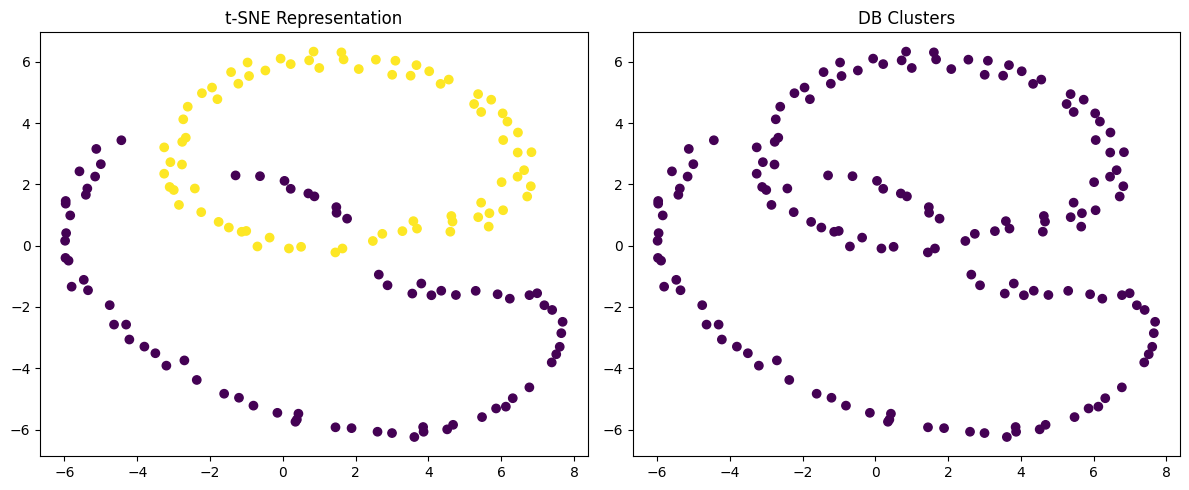

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_circles

n_samples = 150
n_components = 2
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)
init = np.random.normal(loc=0, scale=1, size=(n_samples, n_components))
tsne = manifold.TSNE(
        init=init,
        random_state=32,
        perplexity=30,
        n_iter=2000)
X_tsne = tsne.fit_transform(X)
db = DBSCAN(eps = 1.5, min_samples = 3)
db_labels = db.fit_predict(X_tsne)

# Visualization
plt.figure(figsize=(12, 5))

# Original Space
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=1)
plt.title("t-SNE Representation")

# t-SNE Representation
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap='viridis', alpha=1)
plt.title("DB Clusters")

plt.tight_layout()
plt.show()




### "Cheating" classification

Found that perfect circles kl_divergence value is between 0.214- 0.216 which overall the lowest (makes sense because this is the original structure)

In [ ]:
def classify_kl(val):
  return val < 0.216

In [ ]:
n_results = 56
perplexity_res = 30
n_samples = 150
n_components = 2
start = 0

In [ ]:
X_new = np.zeros(shape =(n_results,n_samples*2))
y_new = np.zeros(n_results)

In [ ]:
X.shape

(150, 2)

In [ ]:
y.shape

(150,)

In [ ]:
np.random.seed(49)

Generating results: 1/56 1.79%
True


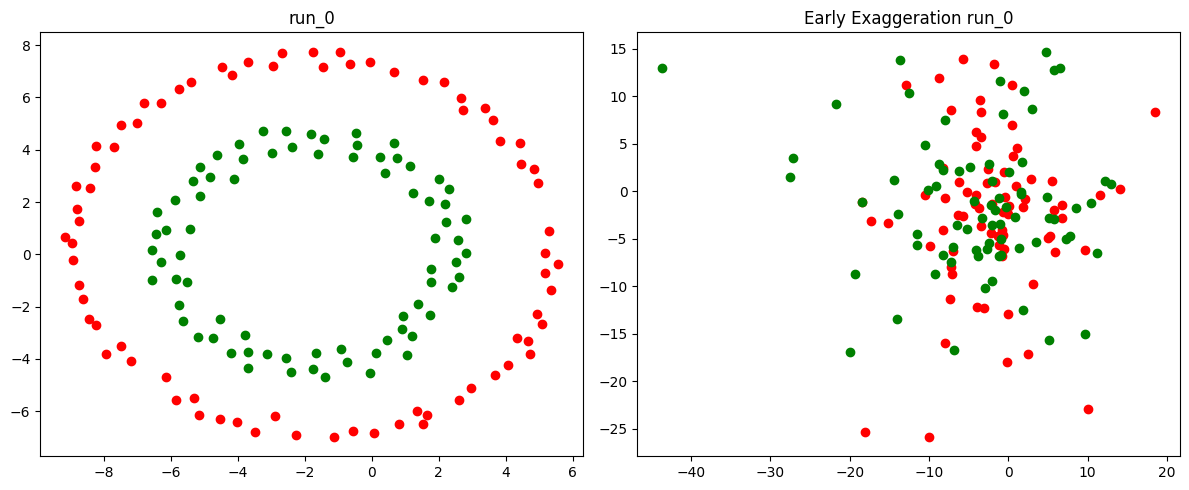

Generating results: 2/56 3.57%
True


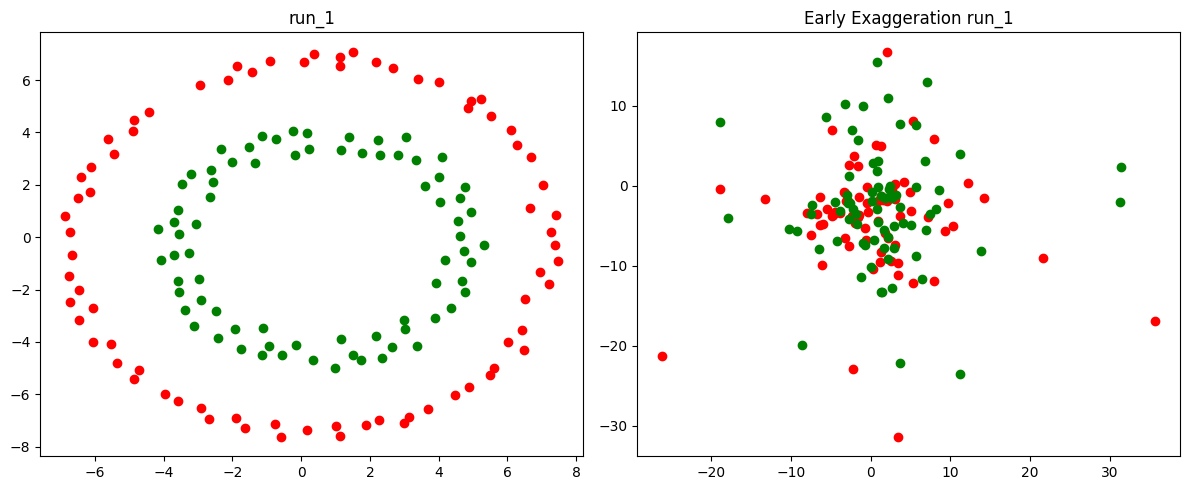

Generating results: 3/56 5.36%
True


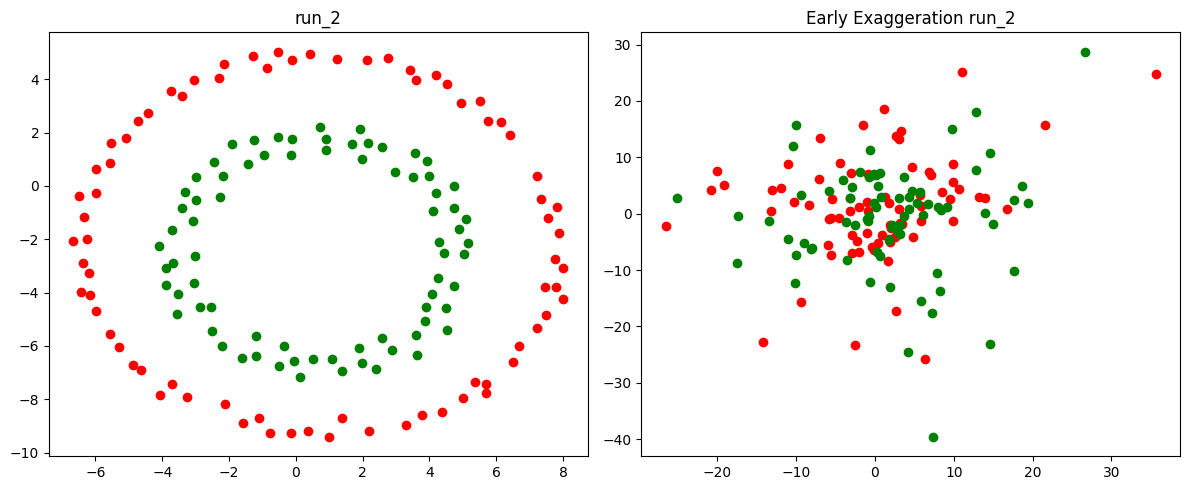

Generating results: 4/56 7.14%
True


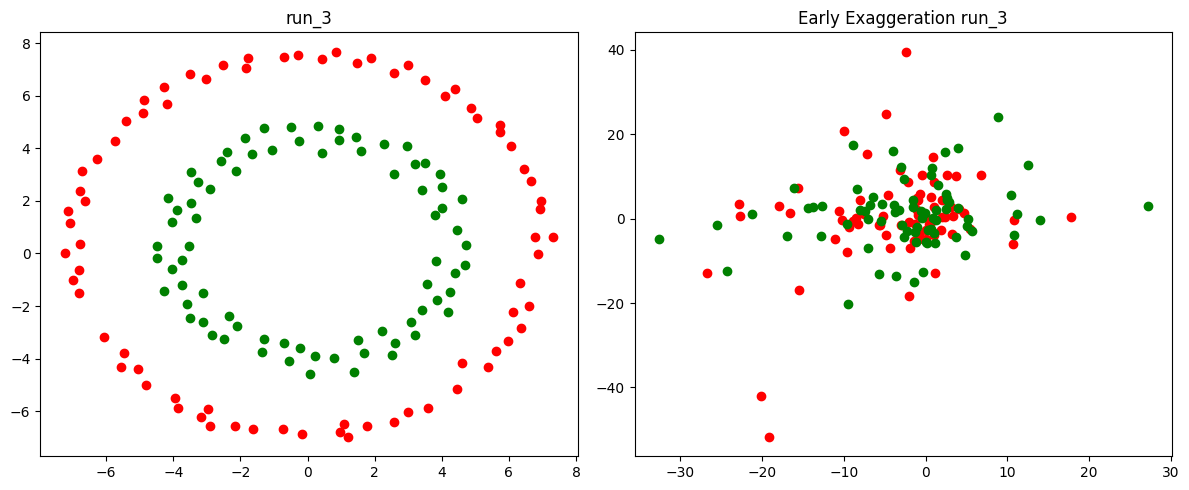

Generating results: 5/56 8.93%
True


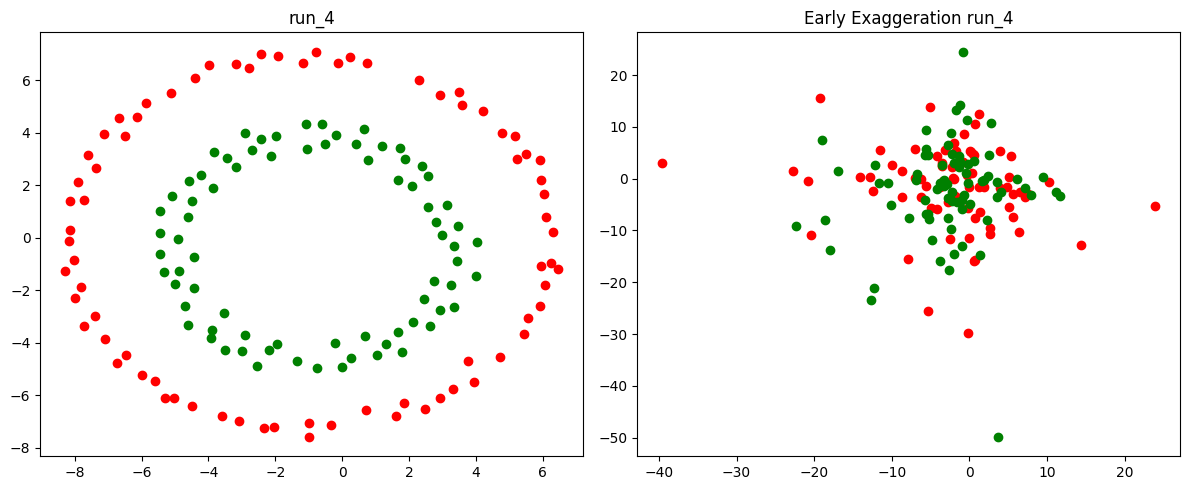

Generating results: 6/56 10.71%
True


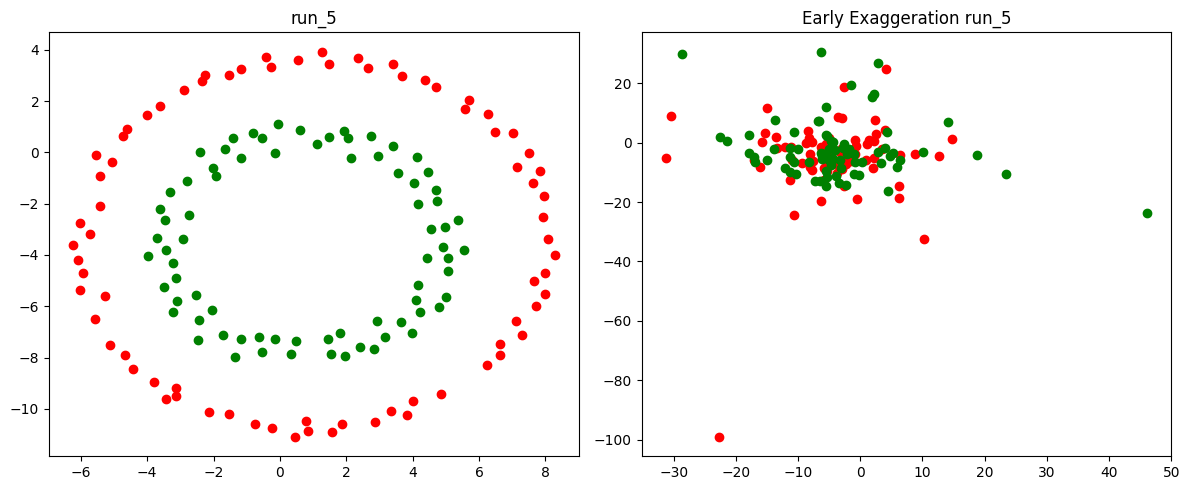

Generating results: 7/56 12.5%
True


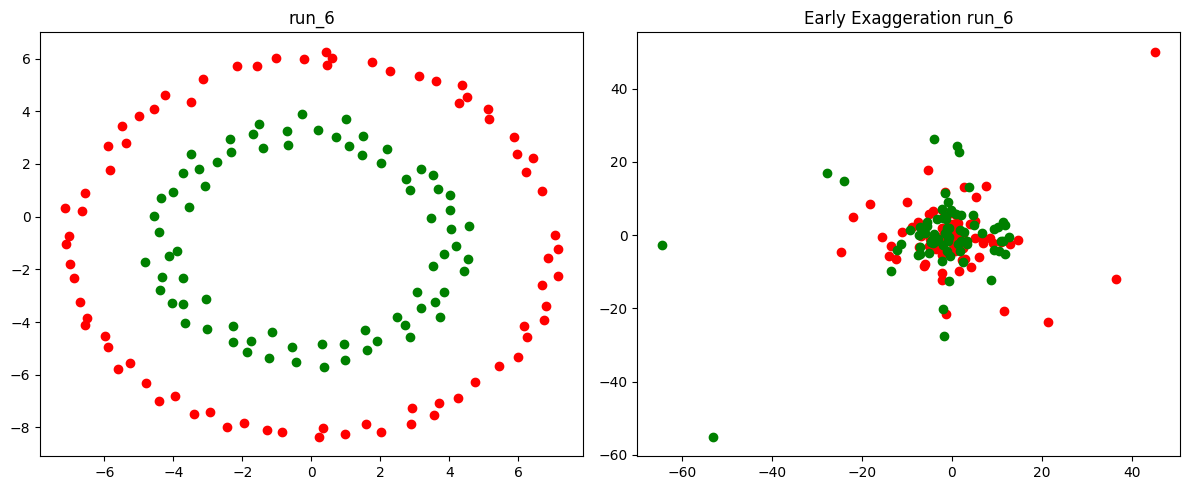

Generating results: 8/56 14.29%
True


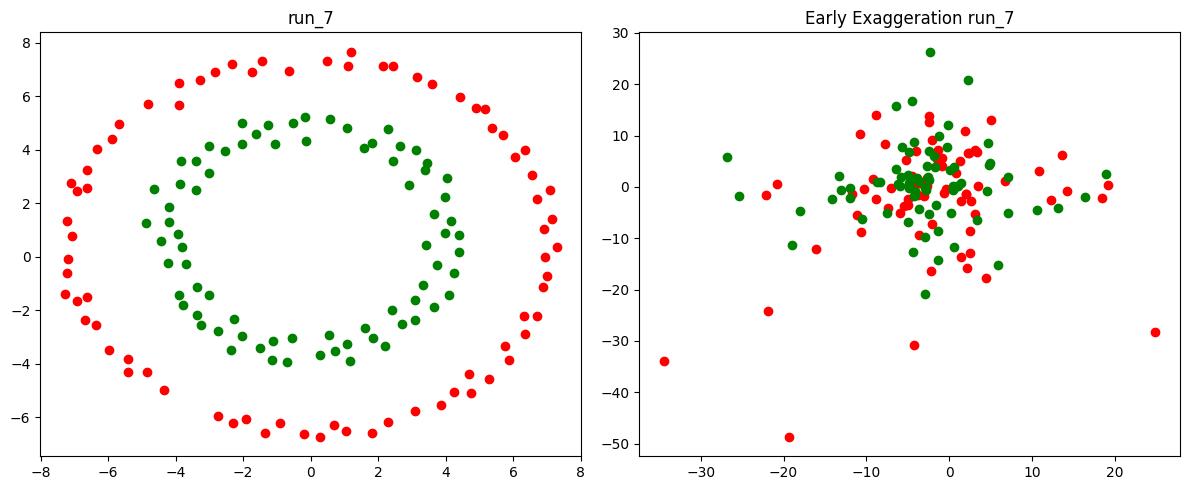

Generating results: 9/56 16.07%
True


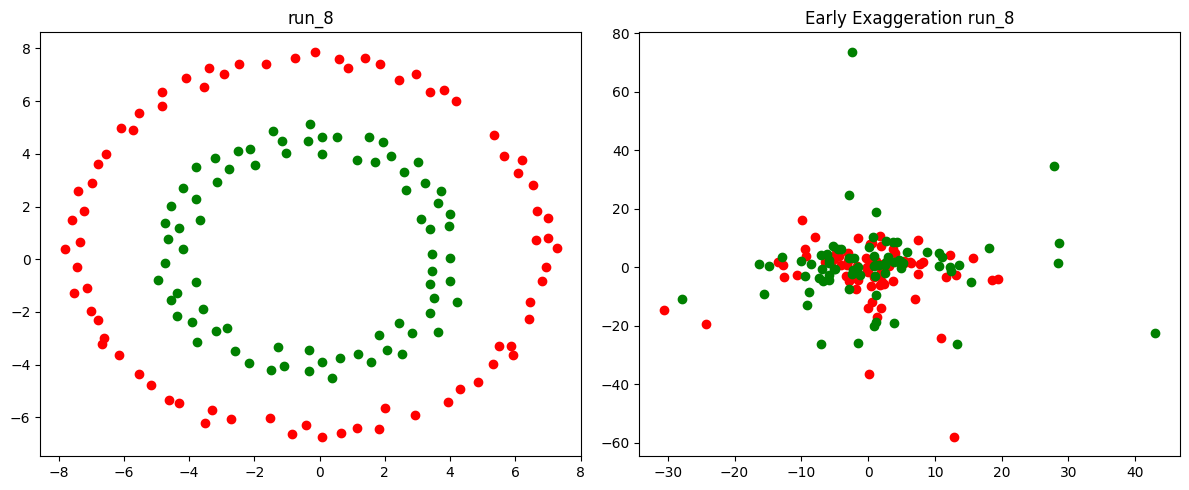

Generating results: 10/56 17.86%


KeyboardInterrupt: 

In [ ]:
circles, labels = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)
red = labels == 0
green = labels == 1
init = np.zeros((n_samples,n_components))
#labels  = np.zeros(n_results)
for i in range (start,start+n_results):
  print(f"Generating results: {i-start+1}/{n_results} {round((i-start+1)*100/(n_results),2)}%")
  #init = np.random.normal(loc=0, scale=10**-4, size=(n_samples, n_components))
  #print(init[green,:].shape)
  init[green,:] = np.random.normal(loc=1, scale=10**-4, size=(sum(green), n_components))
  init[red,:] = np.random.normal(loc=-1, scale=10**-4, size=(sum(red), n_components))
  tsne = manifold.TSNE(
        n_components=n_components,
        init=init,
        random_state=i,
        perplexity=perplexity_res,
        n_iter=2000,
        early_exaggeration = 10,
        n_jobs = -1
    )
  tsne_ex = manifold.TSNE(
        n_components=n_components,
        init=init,
        random_state=i,
        perplexity=perplexity_res,
        n_iter=250,
        early_exaggeration = 250,
        n_jobs = -1
    )

  Y = tsne.fit_transform(circles)
  Y_ex = tsne_ex.fit_transform(circles)
  kl_val = tsne.kl_divergence_
  label = classify_kl(kl_val)
  #print(Y_ex.shape)
  # X_new[i-start,:] = Y_ex.reshape((1,-1))
  # y_new[i-start] = label
  #labels[i] = label
  print(label)
  # print(f"KL divergence value: {kl_val}")
  #dic = {"init": init, "exg": Y_ex, "res":Y, "label": label}
  # #Save dictionary
  # with open(f"/content/drive/MyDrive/TSNE RESULTS/Circles_ex/run_{i}.pkl", 'wb') as pkl_file:
  #    pickle.dump(dic, pkl_file)
  # res = np.hstack((init,Y))
  # res_df = pd.DataFrame(res,columns = ["init_x","init_y","result_x","result_y"])
  # res_df.to_csv(f"/content/drive/MyDrive/TSNE RESULTS/CIRCLES/run_{i}.csv",index = False)
  # Visualization
  plt.figure(figsize=(12, 5))

  plt.subplot(1,2,1)
  plt.scatter(Y[red, 0], Y[red, 1], c="r")
  plt.scatter(Y[green, 0], Y[green, 1], c="g")
  plt.title(f"run_{i}")

  plt.subplot(1,2,2)
  plt.scatter(Y_ex[red, 0], Y_ex[red, 1], c="r")
  plt.scatter(Y_ex[green, 0], Y_ex[green, 1], c="g")
  plt.title(f"Early Exaggeration run_{i}")
  plt.tight_layout()

  plt.show()


In [ ]:
print(f"{np.sum(y)*100/len(y)}% are 1-labeled examples")

In [ ]:
import numpy as np
#X = np.arange(1,7).reshape((2,3))
x = np.arange(1,4)
X = np.vstack((X,x))
X

Read all files from directory and store them in numpy arrays

In [ ]:
import os
n_results = 10000
perplexity_res = 30
n_samples = 150
n_components = 2
X = np.zeros(shape = (n_results,n_samples*2))
#y = []
y = np.zeros(shape = (n_results))
counter = 1
local_download_path = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex"
n_files = len(os.listdir(local_download_path))
for filename in os.listdir(local_download_path):
  if filename.endswith(".pkl"):
    with open(f"{local_download_path}/{filename}", 'rb') as pickle_file:
      print(f"Extracting file {counter}/{n_files} {round((counter)*100/n_files,2)}%")
      loaded_dict = pickle.load(pickle_file)
      new_sample = loaded_dict["init"].reshape(1,-1)
      #X = np.vstack((X,new_sample))
      X[counter-1,:] = new_sample
      #y.append(loaded_dict["label"])
      y[counter-1] = loaded_dict["label"]
      counter +=1

Second directory...

In [ ]:
local_download_path = "/content/drive/MyDrive/TSNE RESULTS/Circles_27k"
n_files = len(os.listdir(local_download_path))
n_files

In [ ]:
import os
perplexity_res = 30
n_samples = 150
n_components = 2
counter = 1
X_load = np.zeros((1,n_samples*2))
y_load = [-1]
local_download_path = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex"
n_files = len(os.listdir(local_download_path))
for filename in os.listdir(local_download_path):
  if filename.endswith(".pkl"):
    with open(f"{local_download_path}/{filename}", 'rb') as pickle_file:
      print(f"Extracting file {counter}/{n_files} {round((counter)*100/n_files,2)}%")
      loaded_dict = pickle.load(pickle_file)
      new_sample = loaded_dict["init"].reshape(1,-1)
      X_load = np.vstack((X_load,new_sample))
      y_load.append(loaded_dict["label"])
      counter +=1

In [ ]:
X_load.shape

In [ ]:
y_load = np.array(y_load)
y_load = y_load[1:]
X_load = X_load[1:,:]

In [ ]:
y_load.shape

In [ ]:
y = y[:-36]

In [ ]:
len(y)

In [ ]:
len(X)

In [ ]:
import os

def create_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        # If not, create the folder
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")

# Example usage
folder_name = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex_csv"
create_folder(folder_name)

Saving csvs

In [ ]:
import pandas as pd
df_X_new = pd.DataFrame(X_load[:10000])
csv_path = "/content/drive/MyDrive/TSNE RESULTS/Circles_ok/circles1.csv"
df_X_new.to_csv(csv_path, header=False,index = False)

In [ ]:
import pandas as pd
df_y_new = pd.DataFrame(y_load[:10000])
csv_path_y = "/content/drive/MyDrive/TSNE RESULTS/Circles_ok/circles_labels1.csv"
df_y_new.to_csv(csv_path_y, header=False, index = False)

Loading csvs

In [ ]:
print(np.sum(y)[0])

Reading of n_results

In [ ]:
# Read from the file and deserialize
X = np.zeros(shape = (n_results,n_samples*2))
y = np.zeros(shape= (n_results))
for i in range(n_results):
  print(f"Extracting data: {i+1}/{n_results} {round((i+1)*100/n_results,2)}%")
  with open(f"/content/drive/MyDrive/TSNE RESULTS/CIRCLES/run_{i}.pkl", 'rb') as pickle_file:
      loaded_dict = pickle.load(pickle_file)
      X[i,:] = loaded_dict["init"].reshape(1,-1)
      y[i] = loaded_dict["label"]

In [ ]:
import pandas as pd

X = pd.read_csv("/content/drive/MyDrive/TSNE RESULTS/Circles_27k_zipped/circles.csv", header= None)
y = pd.read_csv("/content/drive/MyDrive/TSNE RESULTS/Circles_27k_zipped/circles_labels.csv",header = None)
X = X.to_numpy()
y = y.to_numpy()
X = X[:,1:]
y= y[:,1]

Reading Csv of early ex results

In [ ]:
import pandas as pd
csv_path_y = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex_csv/circles_labels.csv"
y = pd.read_csv(csv_path_y).values.astype(int)
csv_path_x = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex_csv/circles.csv"
X = pd.read_csv(csv_path_x).values

In [ ]:
import pandas as pd
csv_path_y = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex_csv/circles_labels2.csv"
y_new = pd.read_csv(csv_path_y).values.astype(int)
csv_path_x = "/content/drive/MyDrive/TSNE RESULTS/Circles_ex_csv/circles2.csv"
X_new = pd.read_csv(csv_path_x).values

In [ ]:
import pandas as pd
csv_path_y = "/content/drive/MyDrive/TSNE RESULTS/Circles_ok/circles_labels2.csv"
y_l = pd.read_csv(csv_path_y).values.astype(int)
csv_path_x = "/content/drive/MyDrive/TSNE RESULTS/Circles_ok/circles2.csv"
X_l = pd.read_csv(csv_path_x).values

In [ ]:
y = y[:,0]

In [ ]:
X_all = np.vstack((X,X_new))
y_all = np.concatenate((y,y_new))

In [ ]:
uni_rows = [tuple(X[i,:]) for i in range(X.shape[0])]
print(len(uni_rows))

In [ ]:
print(X.shape[0])

In [ ]:
print(f"{round(np.sum(y)*100/len(y),2)}% are 1-labeled examples")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(units=300, input_dim=300, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
#custom_optimizer = Adam(learning_rate=10**-3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


In [ ]:
import time
for i in range(X.shape[0]):
  print(y[i])
  points = X[i,:].reshape(150,2)
  plt.scatter(points[:,0],points[:,1])
  plt.show()
  time.sleep(0.5)

In [ ]:
def create_model():
  model = Sequential()

  model.add(Dense(units=300, input_dim=300, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))

  # model.add(Dense(units=256, activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.6))

  # model.add(Dense(units=128, activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.6))

  # model.add(Dense(units=64, activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.6))

  model.add(Dense(units=1, activation='sigmoid'))
  return model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X and y are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Normalize the input features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# def create_model():
#   model = Sequential()
#   model.add(Dense(units=300, input_dim=300, activation='relu'))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Dense(units=256, activation='relu'))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Dense(units=128, activation='relu'))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Dense(units=64, activation='relu'))
#   model.add(BatchNormalization())
#   model.add(Dropout(0.5))
#   model.add(Dense(units=1, activation='sigmoid'))
#   return model

model = create_model()
# Compile the model with a lower learning rate
custom_optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


K- fold cross validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Assuming you have X (features) and y (labels) as your data

# Define your Keras model
def create_model():
    model = Sequential()
    model.add(Dense(units=300, input_dim=300, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    return model

# Set the number of folds
num_folds = 5
seed = 42  # for reproducibility

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Initialize lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate through each fold
for fold, (train_indices, val_indices) in enumerate(kfold.split(X, y)):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Split the data into training and validation sets for this fold
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Create a new instance of the model for each fold
    model = create_model()

    # Compile the model with a lower learning rate
    custom_optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    # Train the model on the training data for this fold
    model.fit(X_train, y_train, epochs=15, batch_size=32, callbacks=[early_stopping])

    # Evaluate the model on the validation data for this fold
    val_predictions = (model.predict(X_val) > 0.5).astype(int)
    accuracy = accuracy_score(y_val, val_predictions)
    accuracy_scores.append(accuracy)

    print(f"Validation Accuracy: {accuracy}")

# Print the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage Validation Accuracy: {average_accuracy}")


#Blobs

blobs, perplexity=5 in 1.5 sec
blobs, perplexity=30 in 1.4 sec
blobs, perplexity=50 in 0.8 sec
blobs, perplexity=100 in 1.9 sec


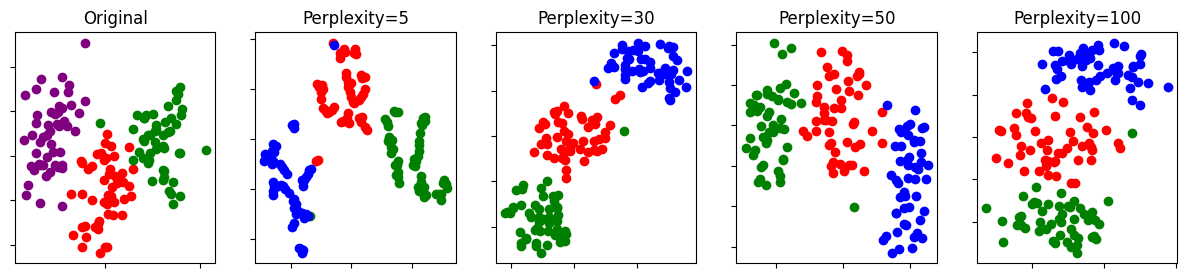

In [ ]:
n_samples = 150
n_features = 3
n_components = 2
random_state = 3
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 3))
perplexities = [5, 30, 50, 100]
X, y = datasets.make_blobs(n_samples=n_samples, centers = 3,\
                           n_features = n_features, random_state=random_state,\
                           cluster_std = 3.7)
red = y == 0
green = y == 1
blue = y==2

ax = subplots[0]
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
ax.scatter(X_pca[red,0],X_pca[red,1],c="r")
ax.scatter(X_pca[green,0],X_pca[green,1],c="g")
ax.scatter(X_pca[blue,0],X_pca[blue,1],c="purple")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_title("Original")
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="pca",
        random_state=random_state,
        perplexity=perplexity,
        n_iter=2000,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("blobs, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="blue")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

Going for 30 in perplexity

Run 0: Silhouette Coefficient = 0.6230926769372798


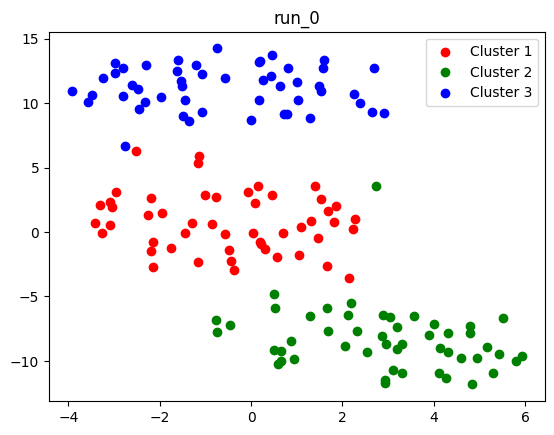

Run 1: Silhouette Coefficient = 0.6280373450979592


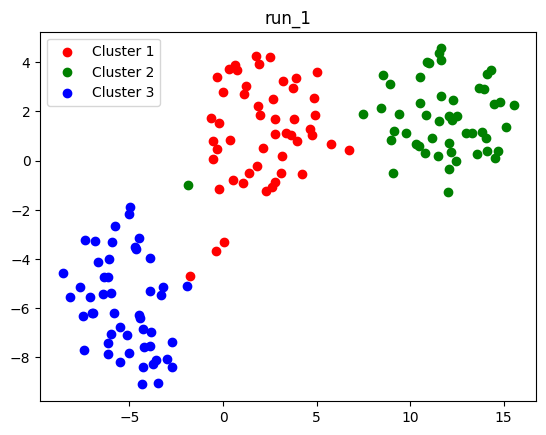

Run 2: Silhouette Coefficient = 0.6250654880599149


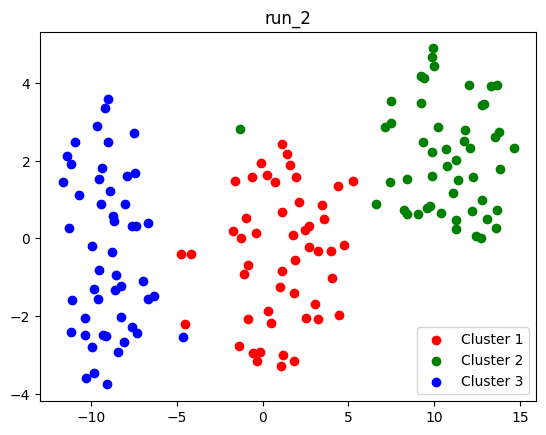

Run 3: Silhouette Coefficient = 0.628143134744496


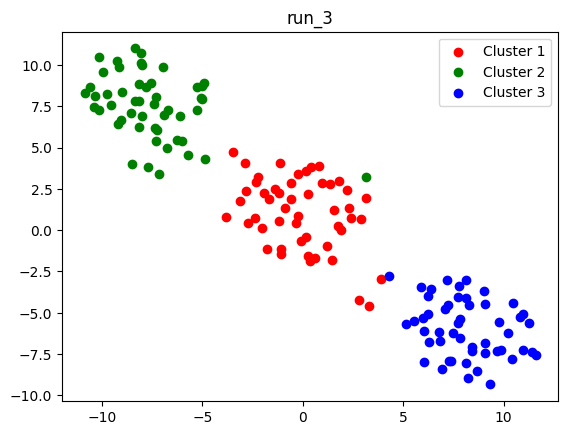

Run 4: Silhouette Coefficient = 0.6287581572050869


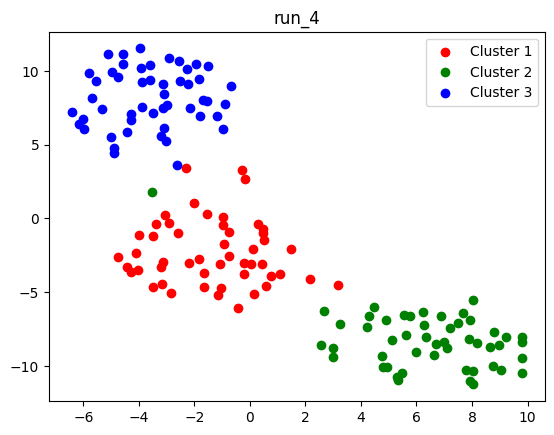

Run 5: Silhouette Coefficient = 0.6241761395205454


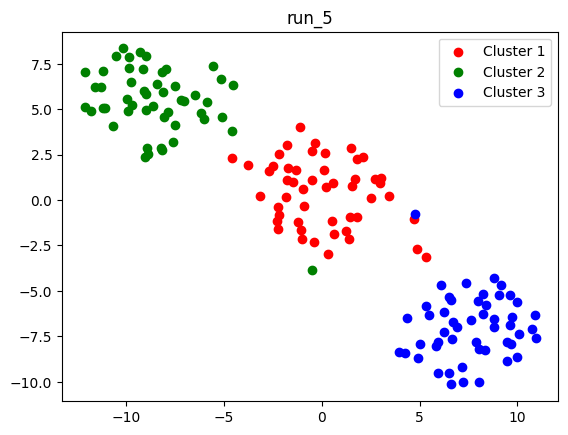

Run 6: Silhouette Coefficient = 0.6224783448316162


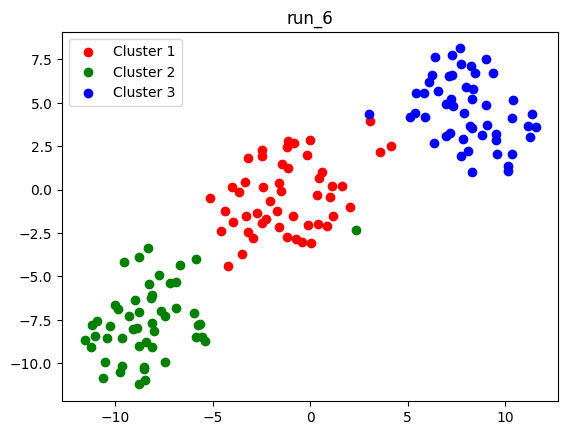

Run 7: Silhouette Coefficient = 0.625732035703004


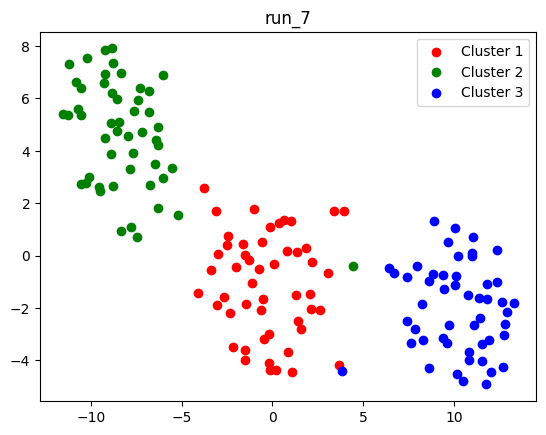

Run 8: Silhouette Coefficient = 0.623664767931013


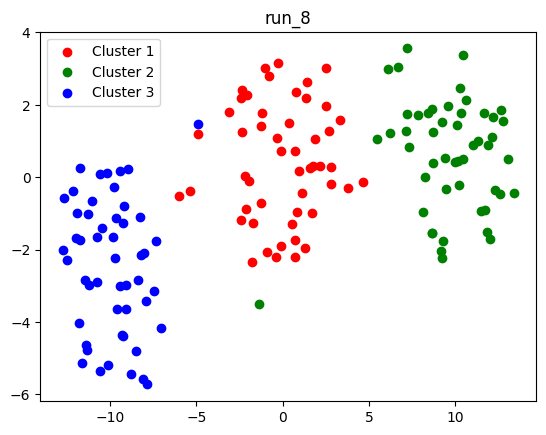

Run 9: Silhouette Coefficient = 0.6147243182314351


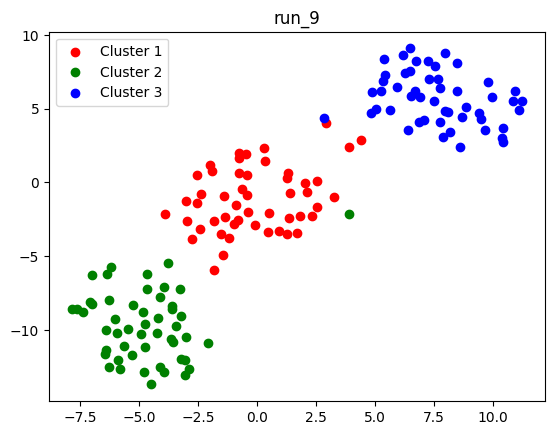

Run 10: Silhouette Coefficient = 0.63113425186003


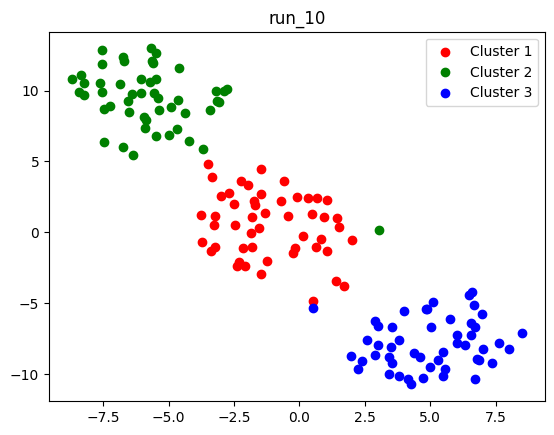

Run 11: Silhouette Coefficient = 0.6307029047117186


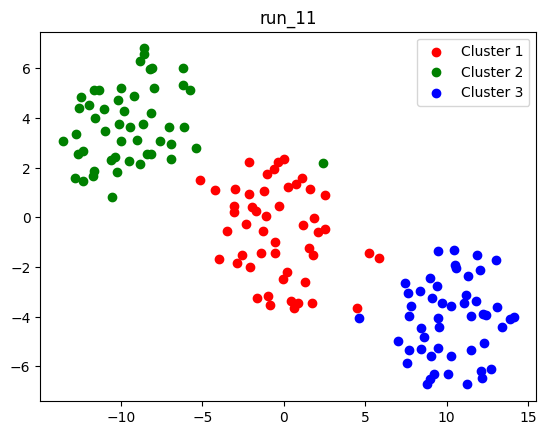

Run 12: Silhouette Coefficient = 0.6222144708680204


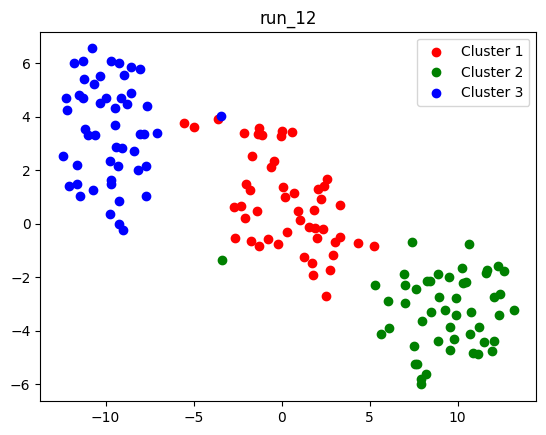

Run 13: Silhouette Coefficient = 0.6411211104995683


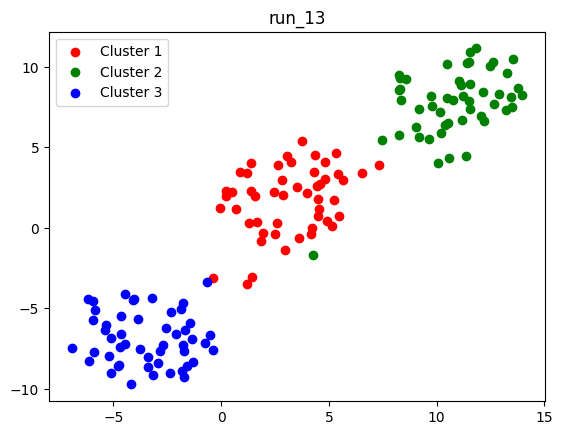

Run 14: Silhouette Coefficient = 0.6212292127359834


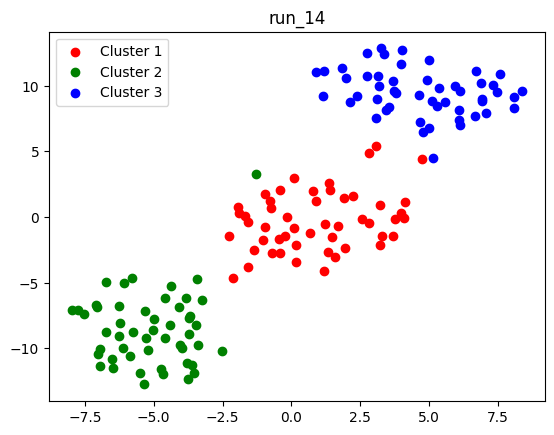

Run 15: Silhouette Coefficient = 0.6257259257082599


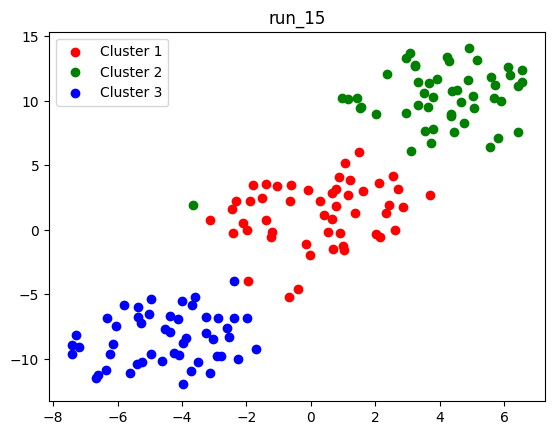

Run 16: Silhouette Coefficient = 0.627969278256113


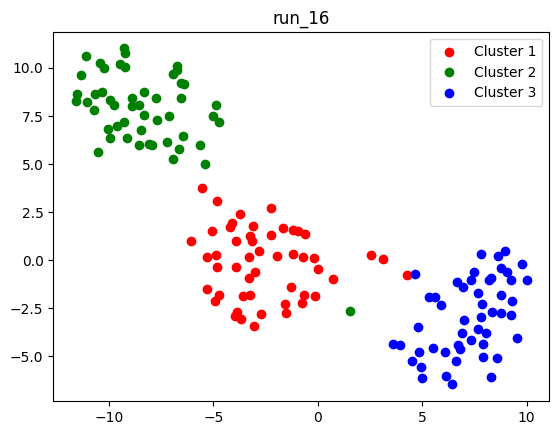

Run 17: Silhouette Coefficient = 0.6284260594540038


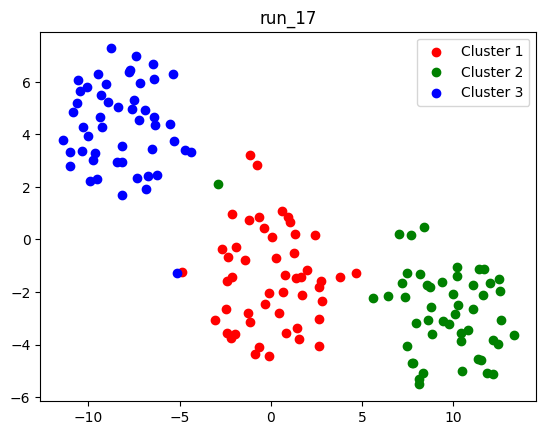

Run 18: Silhouette Coefficient = 0.6189220621083377


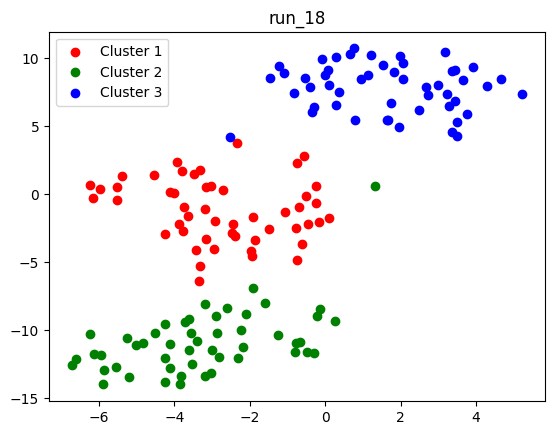

Run 19: Silhouette Coefficient = 0.6295072524269876


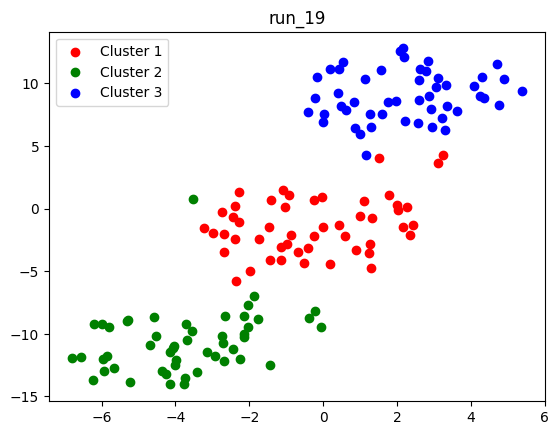

Run 20: Silhouette Coefficient = 0.6249692774404287


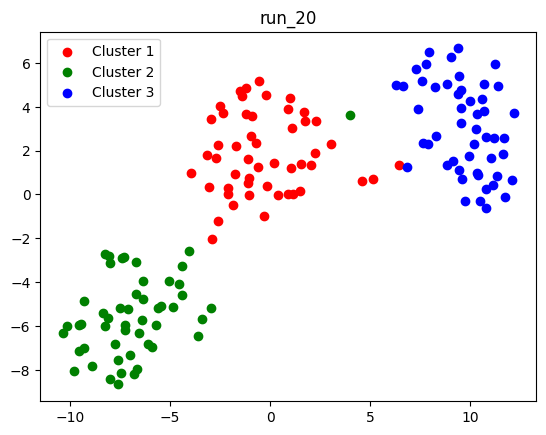

Run 21: Silhouette Coefficient = 0.6325043029807969


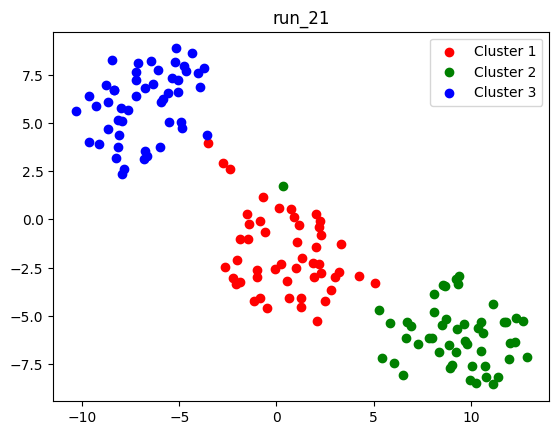

Run 22: Silhouette Coefficient = 0.6210466204583593


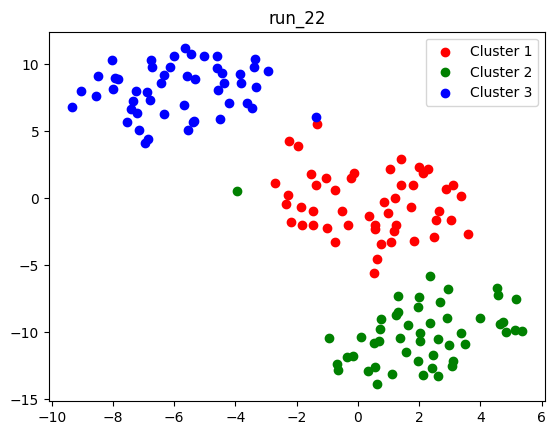

Run 23: Silhouette Coefficient = 0.6215383088960073


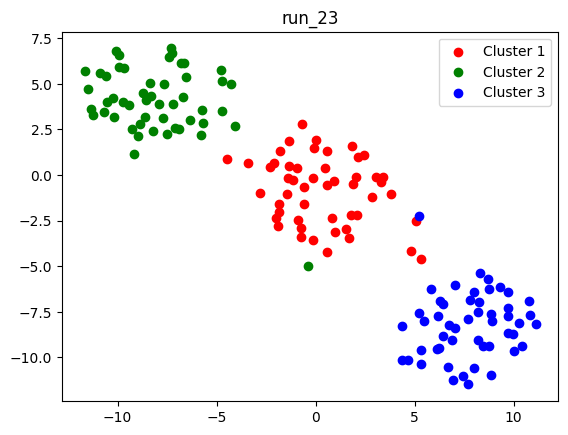

Run 24: Silhouette Coefficient = 0.6242275410373458


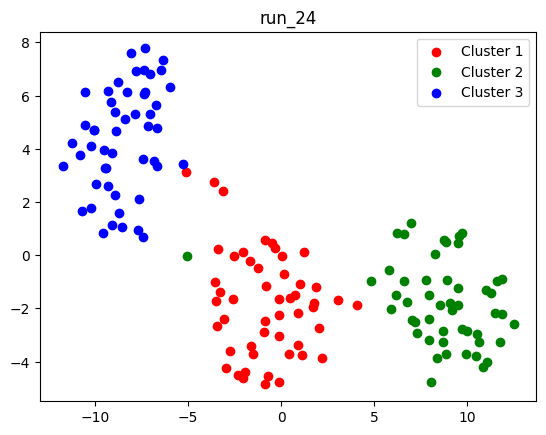

Run 25: Silhouette Coefficient = 0.6249576864327826


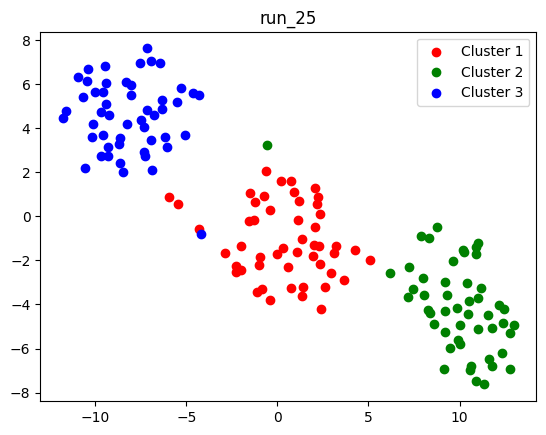

Run 26: Silhouette Coefficient = 0.6268287755253635


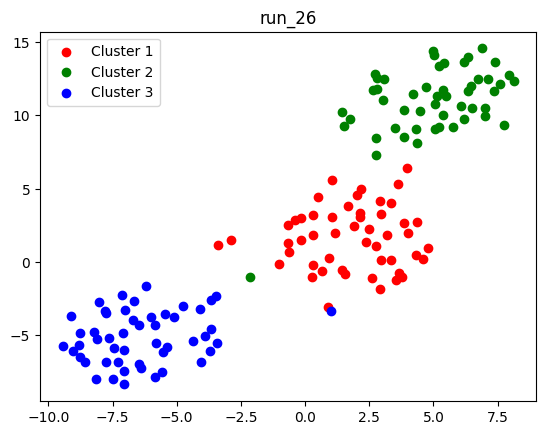

Run 27: Silhouette Coefficient = 0.6320398475693259


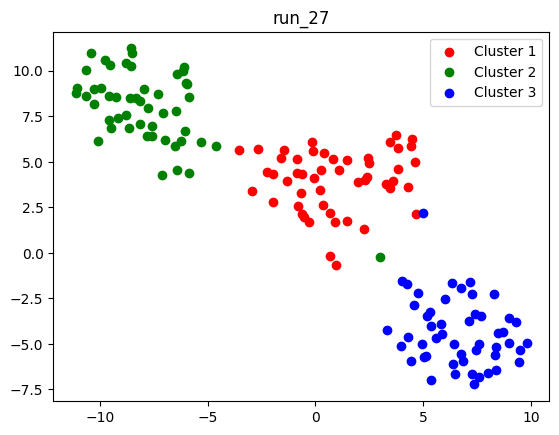

Run 28: Silhouette Coefficient = 0.6227326820629789


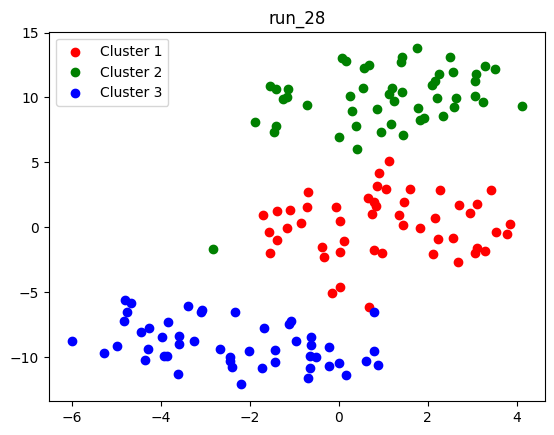

Run 29: Silhouette Coefficient = 0.6275458455948988


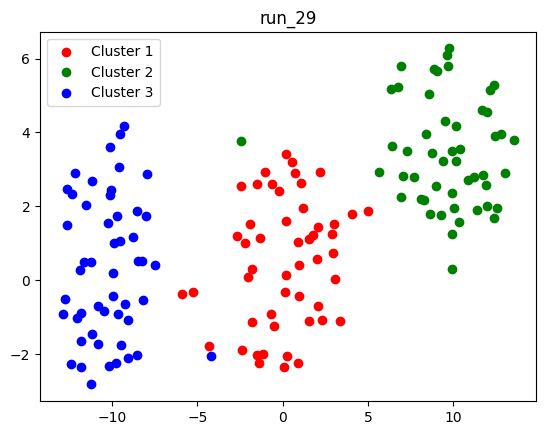

Run 30: Silhouette Coefficient = 0.6340354508561338


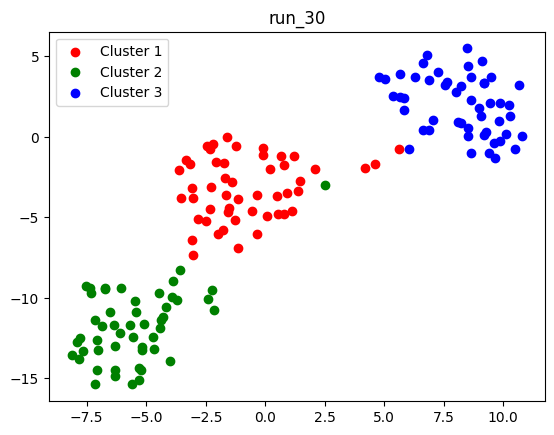

Run 31: Silhouette Coefficient = 0.6237545953102285


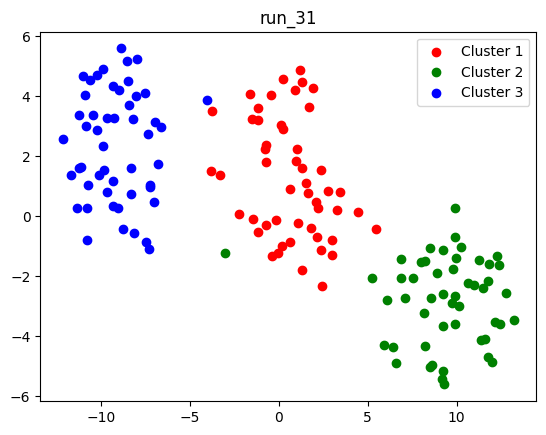

Run 32: Silhouette Coefficient = 0.6342996306348849


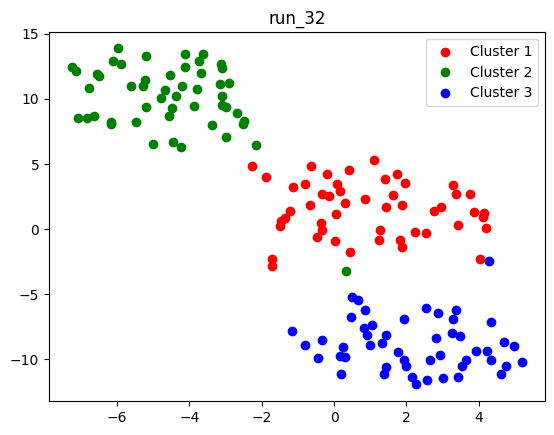

Run 33: Silhouette Coefficient = 0.6180252596953583


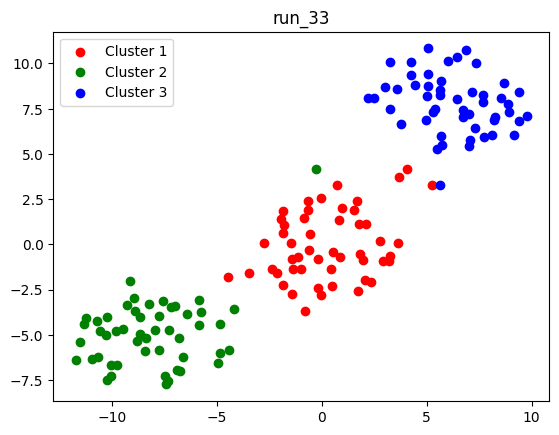

Run 34: Silhouette Coefficient = 0.6366415993195034


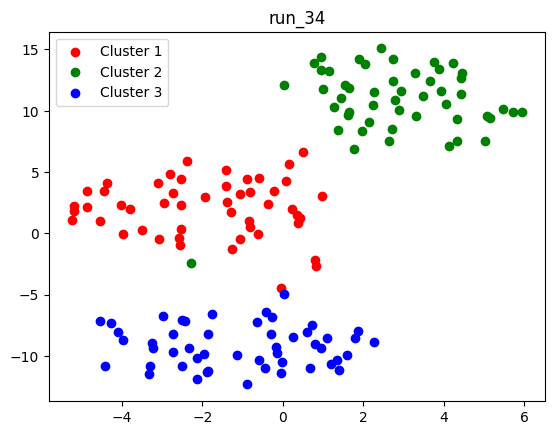

Run 35: Silhouette Coefficient = 0.6262593634099474


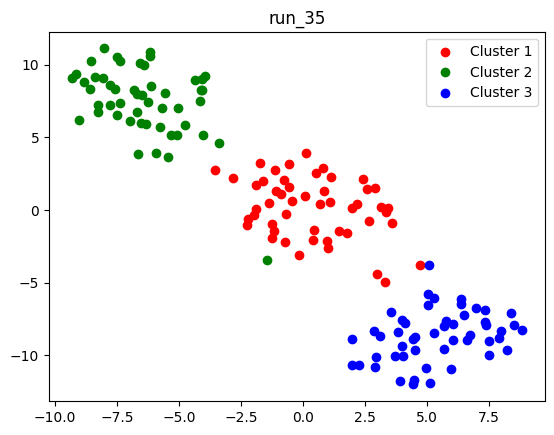

Run 36: Silhouette Coefficient = 0.6207402310753749


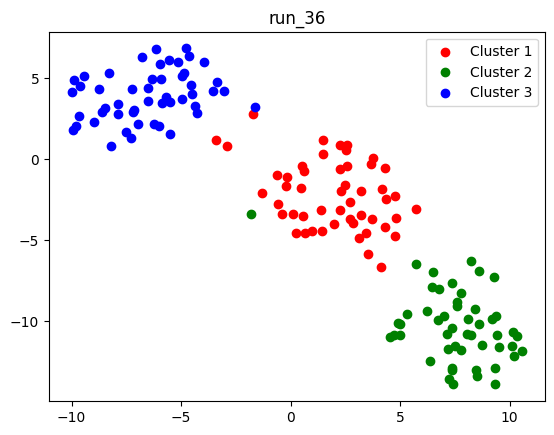

Run 37: Silhouette Coefficient = 0.6182547317820936


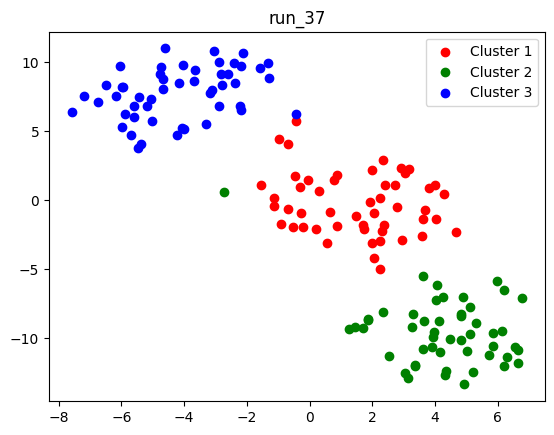

Run 38: Silhouette Coefficient = 0.6327013647604373


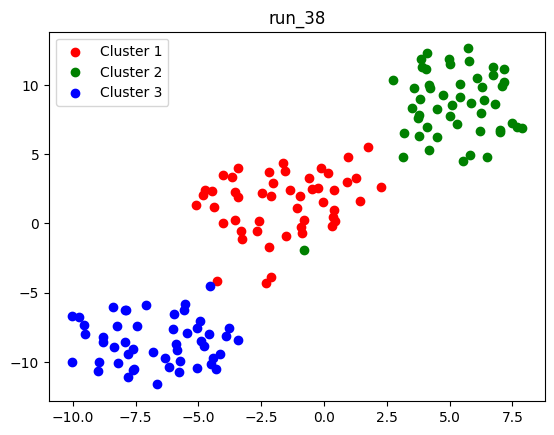

Run 39: Silhouette Coefficient = 0.6223568327855656


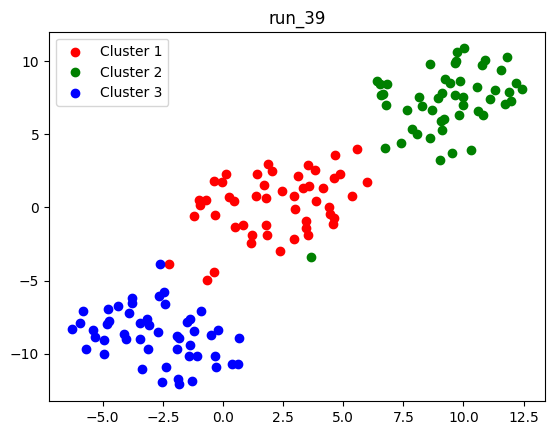

Run 40: Silhouette Coefficient = 0.6207768383402317


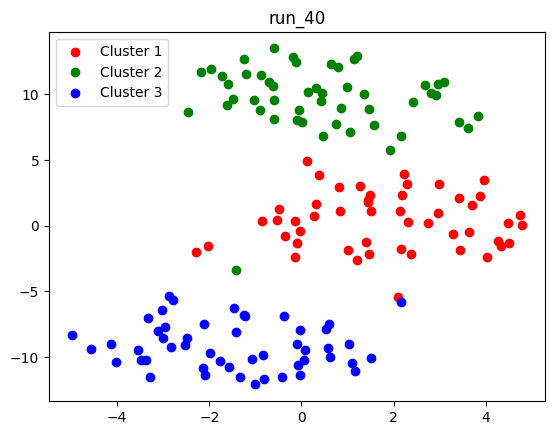

Run 41: Silhouette Coefficient = 0.6251508795831976


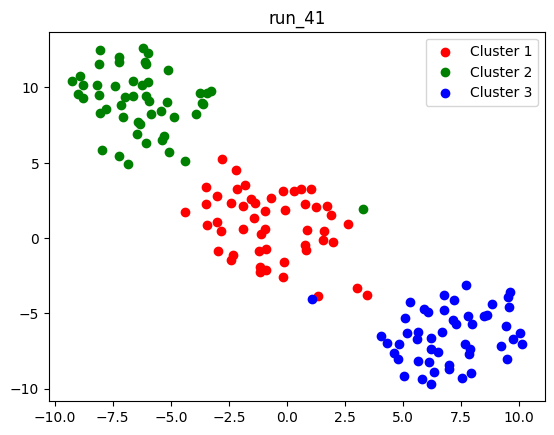

Run 42: Silhouette Coefficient = 0.6206775926587746


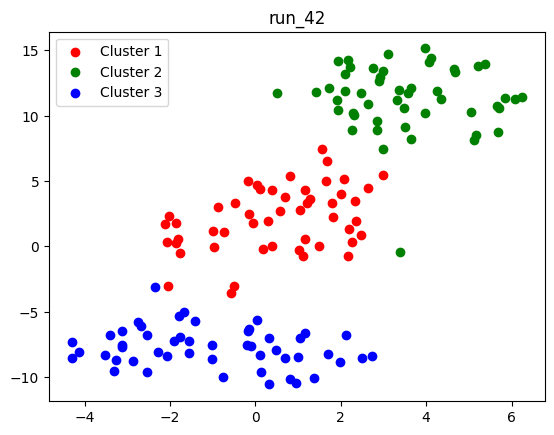

Run 43: Silhouette Coefficient = 0.6285365678286516


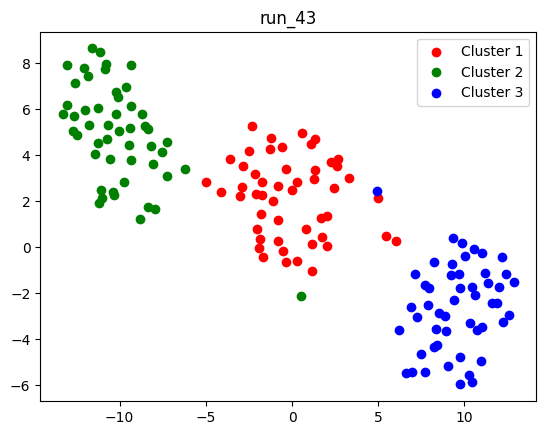

Run 44: Silhouette Coefficient = 0.6252063278124003


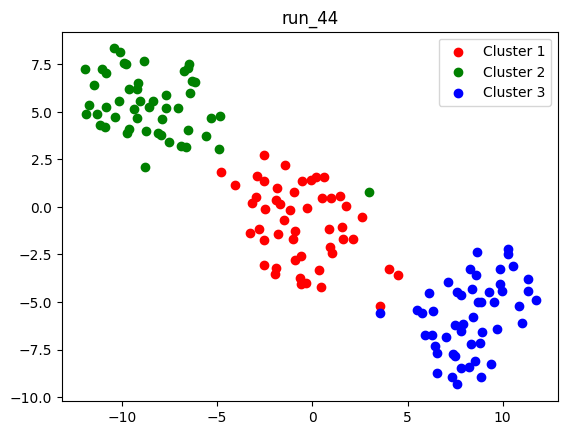

Run 45: Silhouette Coefficient = 0.6086503806688298


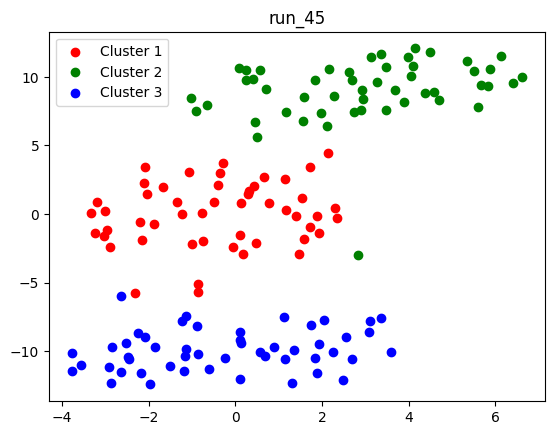

Run 46: Silhouette Coefficient = 0.6127585681565129


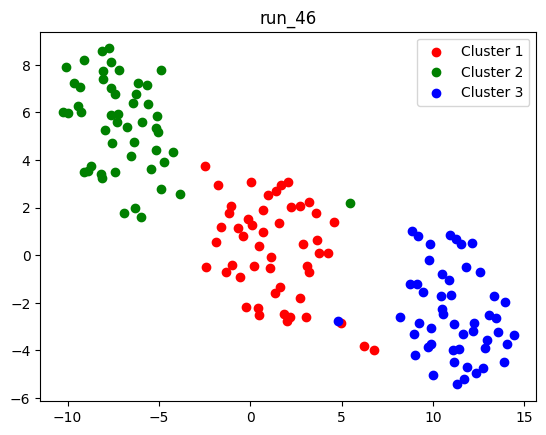

Run 47: Silhouette Coefficient = 0.6255578682923048


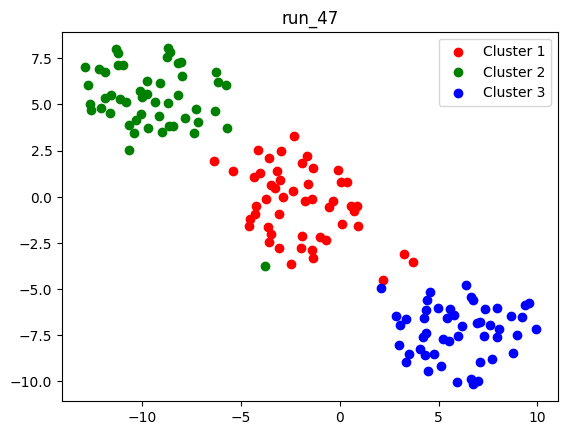

Run 48: Silhouette Coefficient = 0.6170925551863299


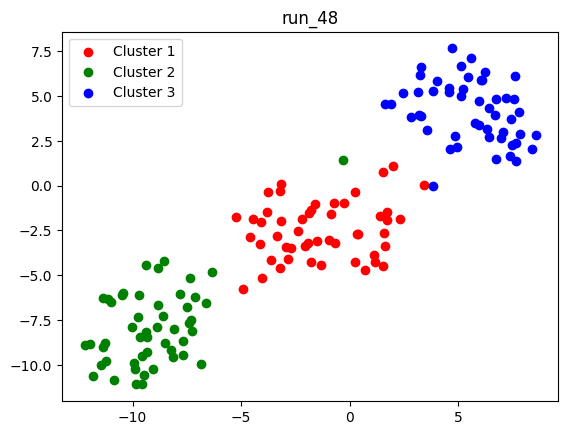

Run 49: Silhouette Coefficient = 0.6211748520296072


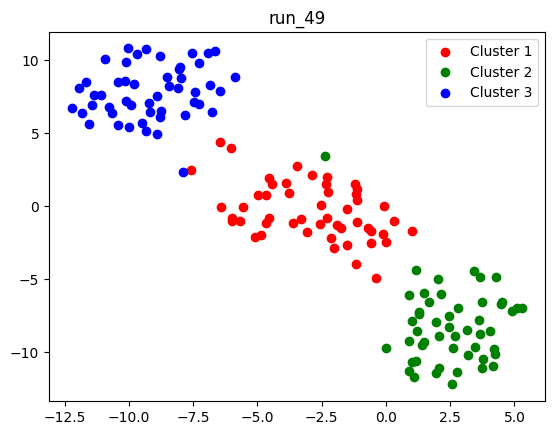

Run 50: Silhouette Coefficient = 0.6208163421196982


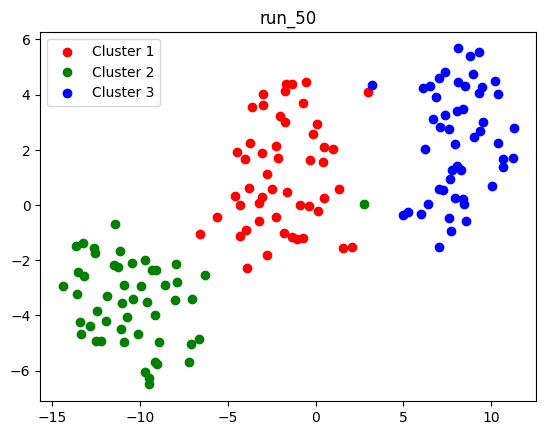

Run 51: Silhouette Coefficient = 0.6136143703905527


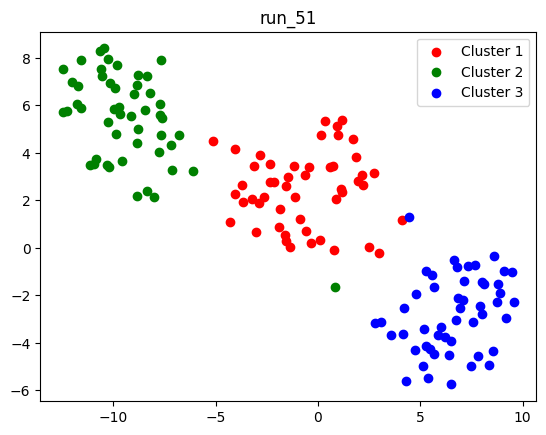

Run 52: Silhouette Coefficient = 0.627670144782964


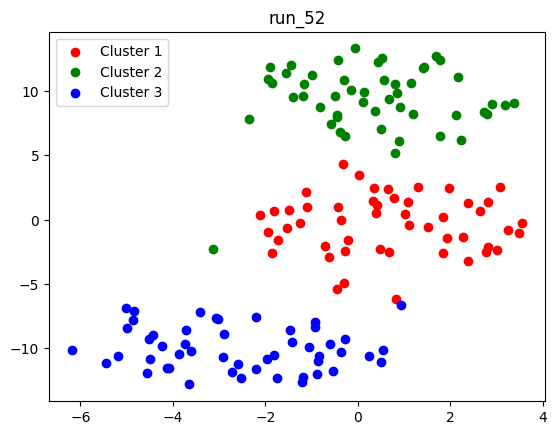

Run 53: Silhouette Coefficient = 0.6168709897307753


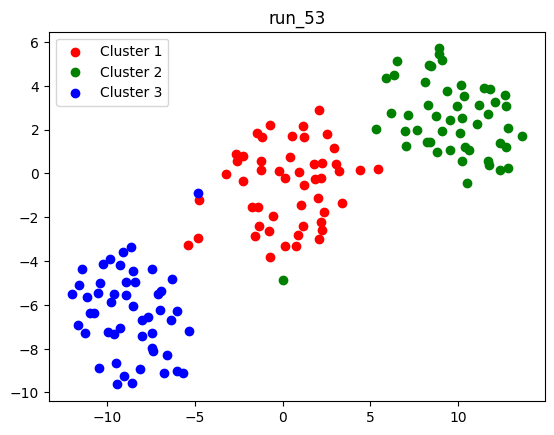

Run 54: Silhouette Coefficient = 0.6255861145419123


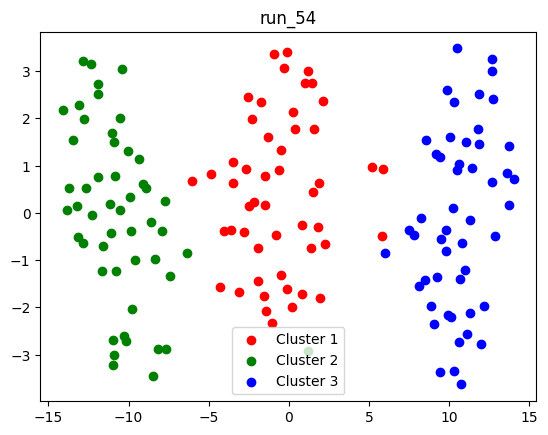

Run 55: Silhouette Coefficient = 0.6196916360605755


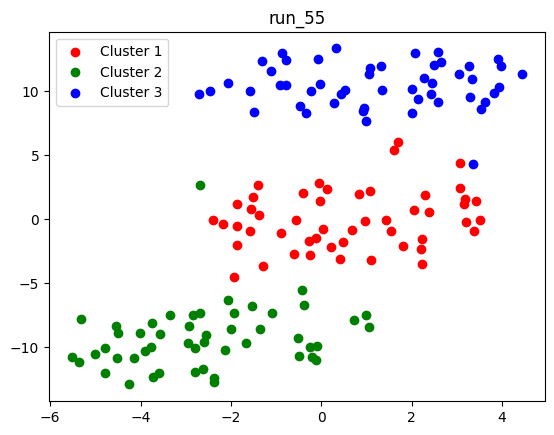

Run 56: Silhouette Coefficient = 0.6149645913172439


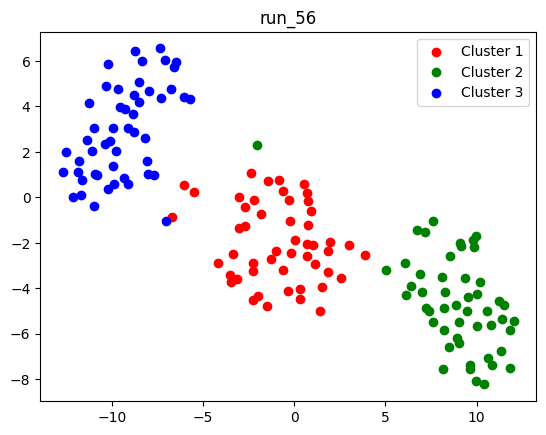

Run 57: Silhouette Coefficient = 0.6133316064064412


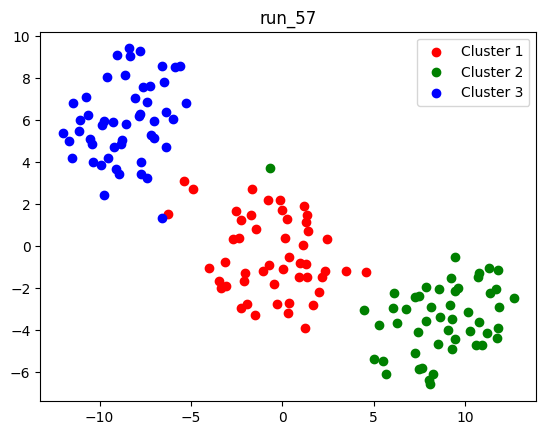

Run 58: Silhouette Coefficient = 0.6154517866052538


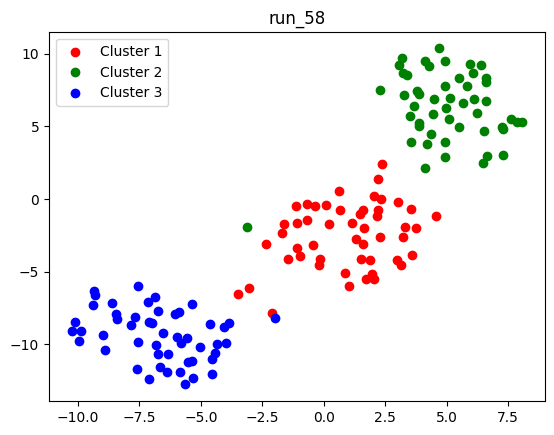

Run 59: Silhouette Coefficient = 0.6261669625359342


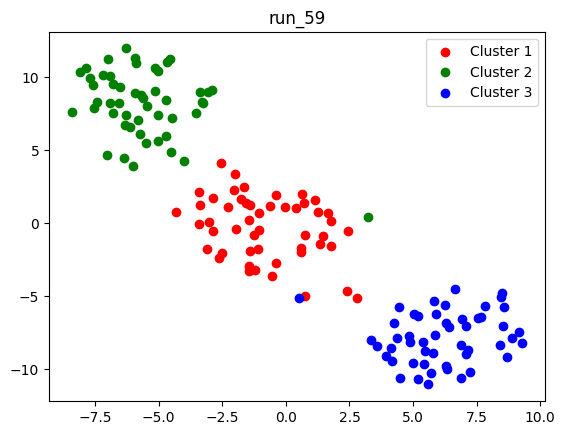

Run 60: Silhouette Coefficient = 0.6291663027627596


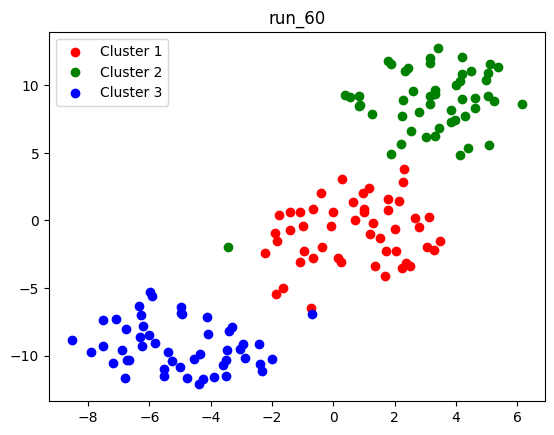

Run 61: Silhouette Coefficient = 0.6302313094933931


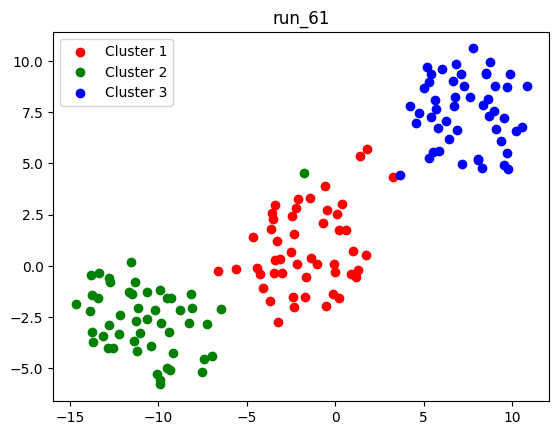

Run 62: Silhouette Coefficient = 0.6166315016201308


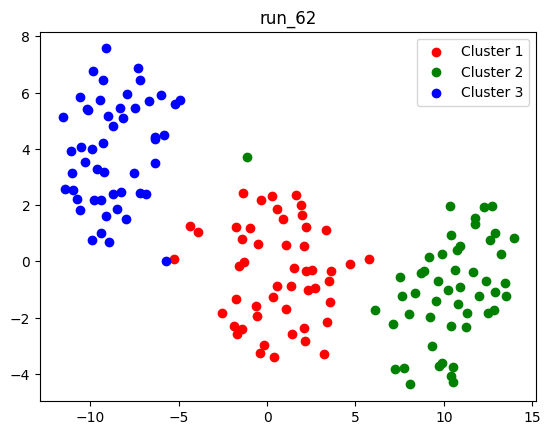

Run 63: Silhouette Coefficient = 0.6368938978208697


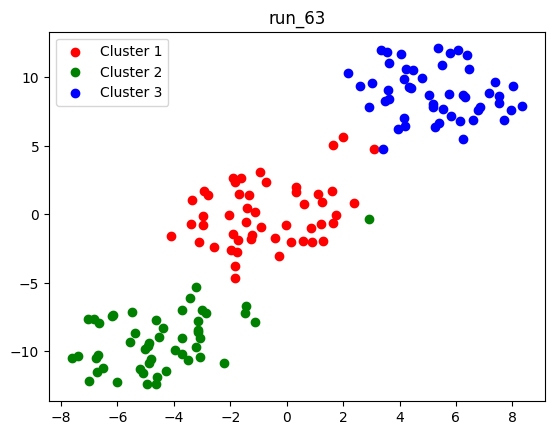

Run 64: Silhouette Coefficient = 0.626431910858121


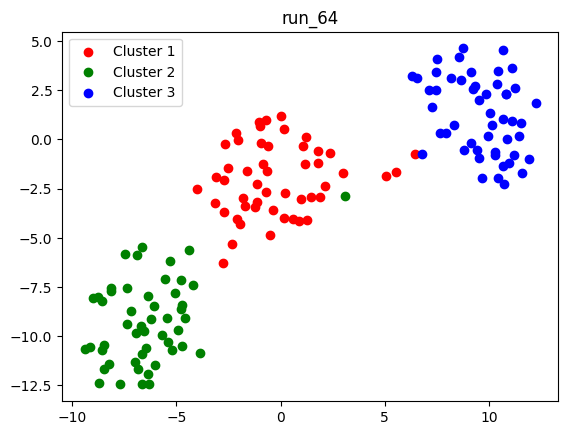

Run 65: Silhouette Coefficient = 0.6115242351138399


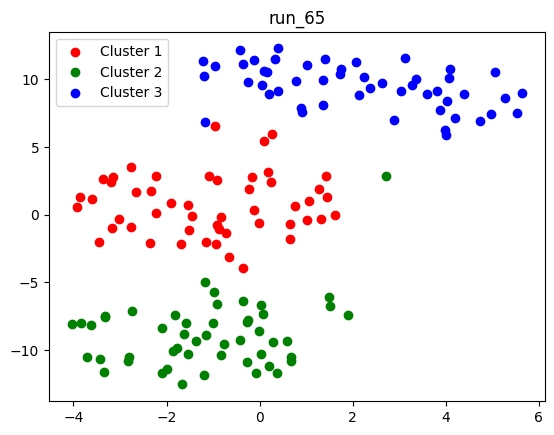

Run 66: Silhouette Coefficient = 0.6275955791375405


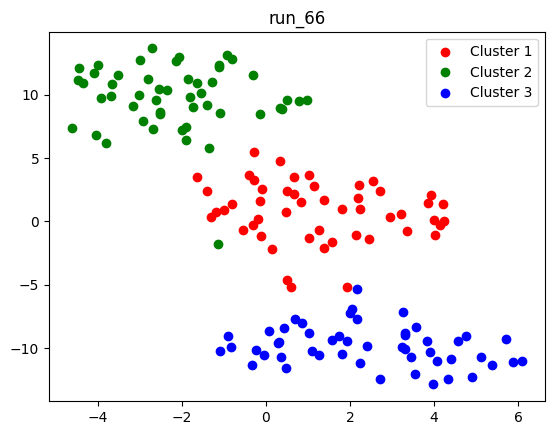

Run 67: Silhouette Coefficient = 0.6239433000177093


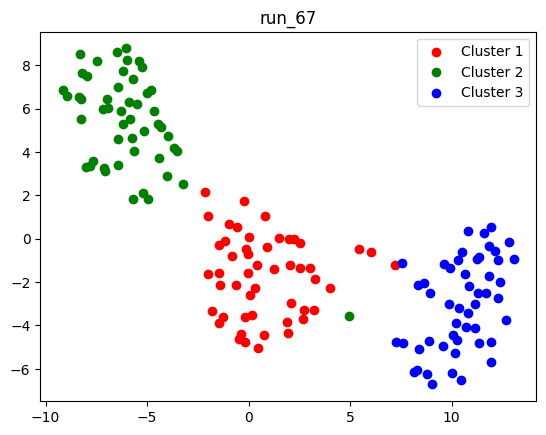

Run 68: Silhouette Coefficient = 0.6206949674939637


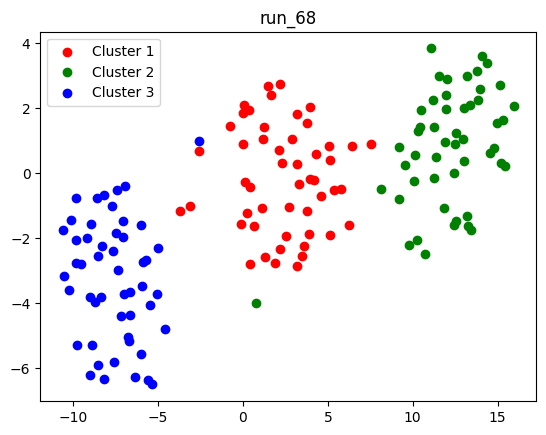

Run 69: Silhouette Coefficient = 0.6216000469606693


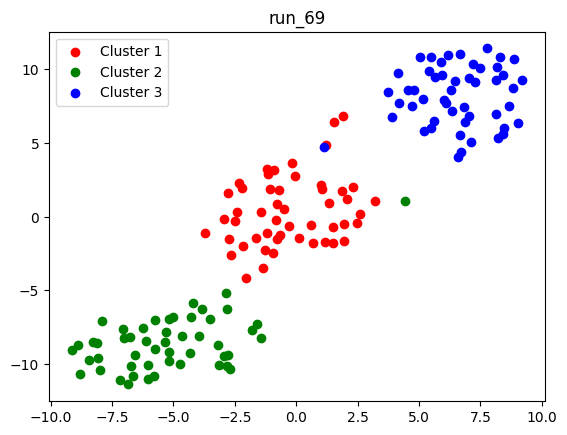

Run 70: Silhouette Coefficient = 0.6219655371985329


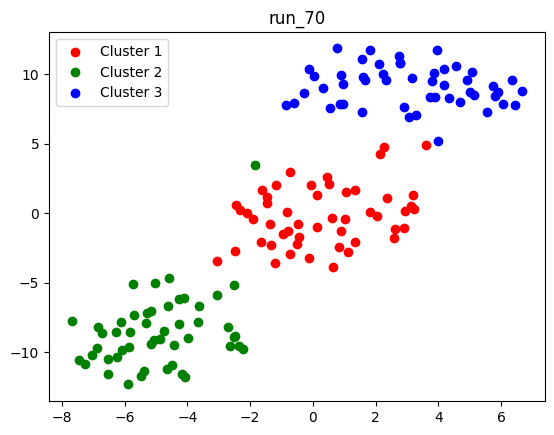

Run 71: Silhouette Coefficient = 0.632477397480935


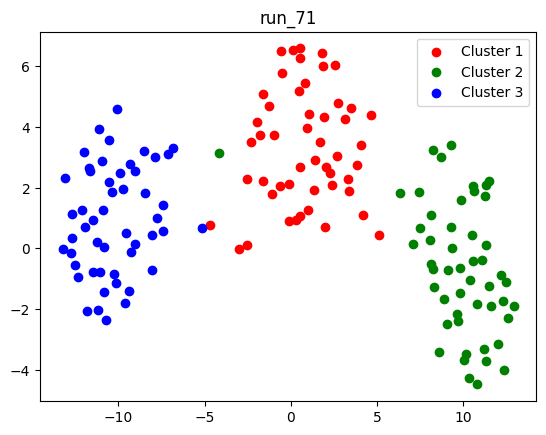

Run 72: Silhouette Coefficient = 0.6318336121300786


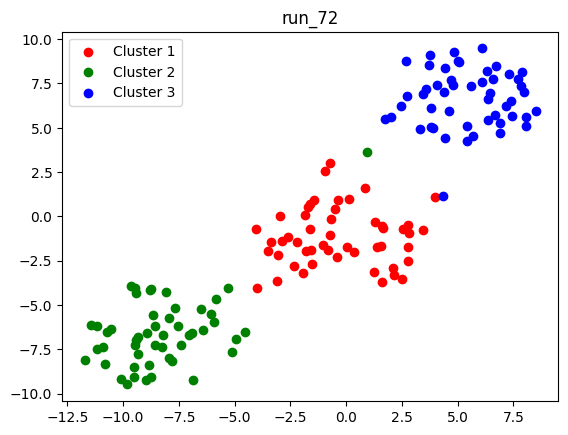

Run 73: Silhouette Coefficient = 0.622730878932389


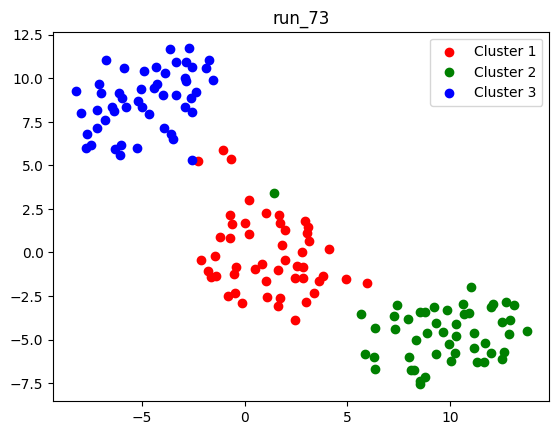

Run 74: Silhouette Coefficient = 0.612184640607321


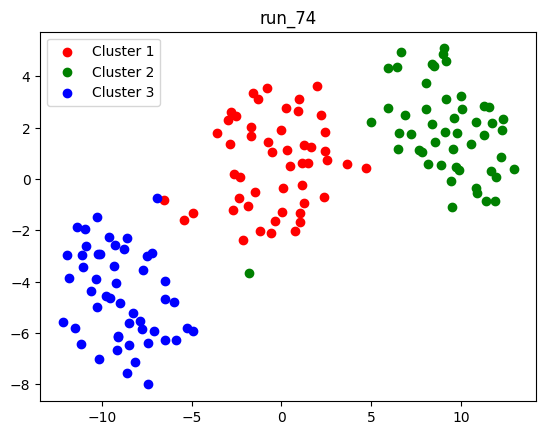

Run 75: Silhouette Coefficient = 0.609420965983971


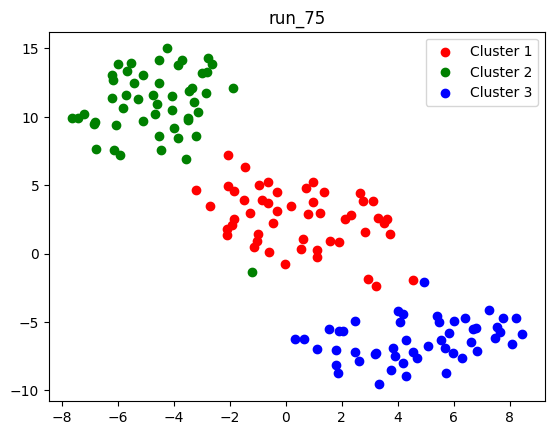

Run 76: Silhouette Coefficient = 0.6286137114779442


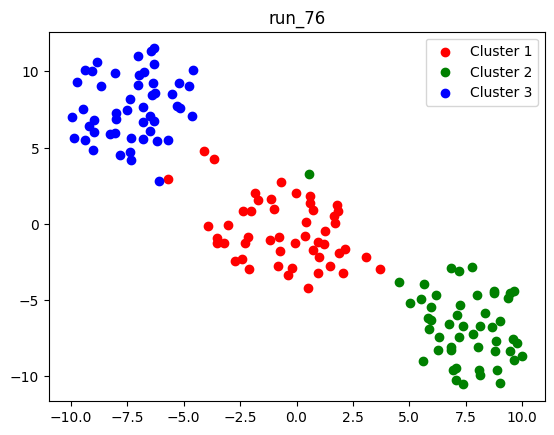

Run 77: Silhouette Coefficient = 0.6225306577636525


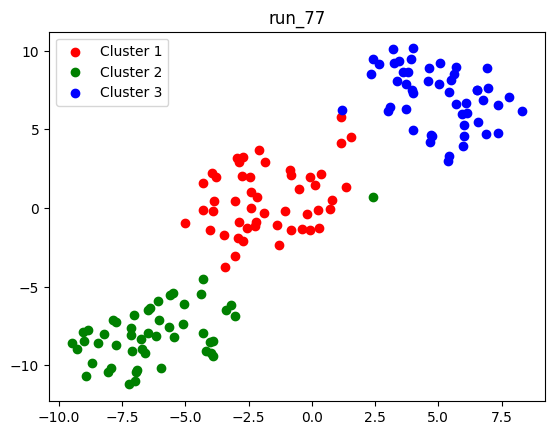

Run 78: Silhouette Coefficient = 0.6230889430396935


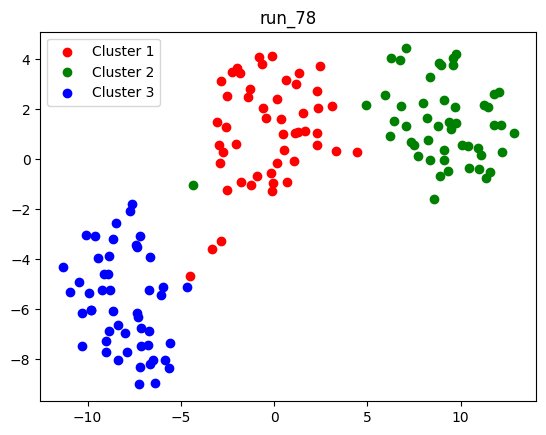

Run 79: Silhouette Coefficient = 0.6364657309117541


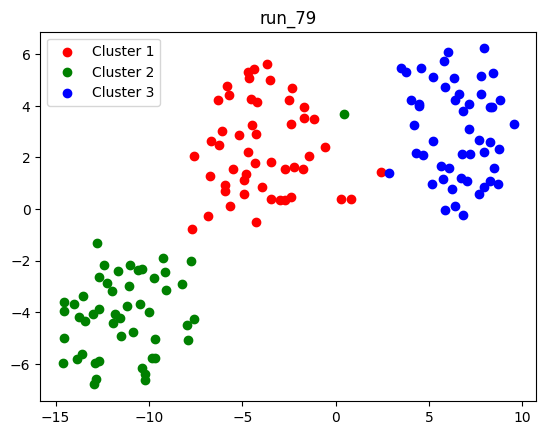

Run 80: Silhouette Coefficient = 0.6191574289680793


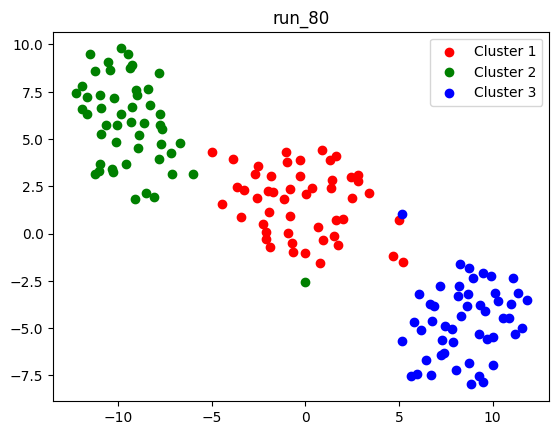

Run 81: Silhouette Coefficient = 0.6112349546051301


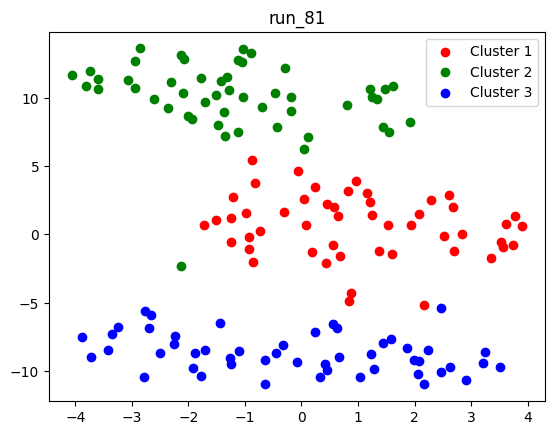

Run 82: Silhouette Coefficient = 0.6159028346329105


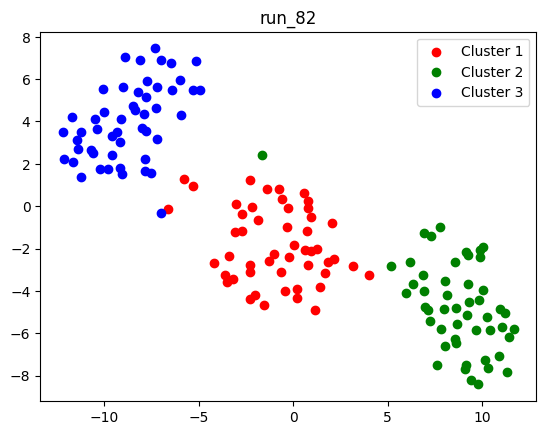

Run 83: Silhouette Coefficient = 0.6198800126391931


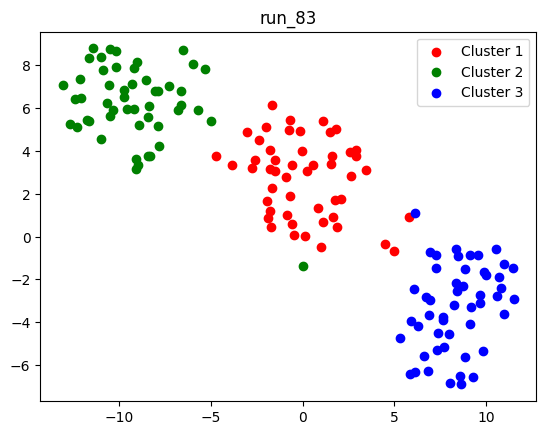

Run 84: Silhouette Coefficient = 0.6334743164011354


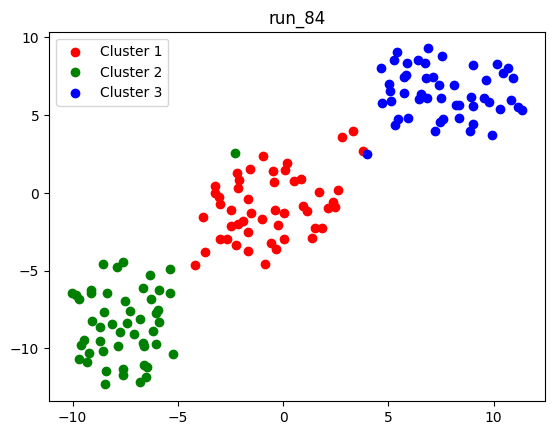

Run 85: Silhouette Coefficient = 0.6069769874668651


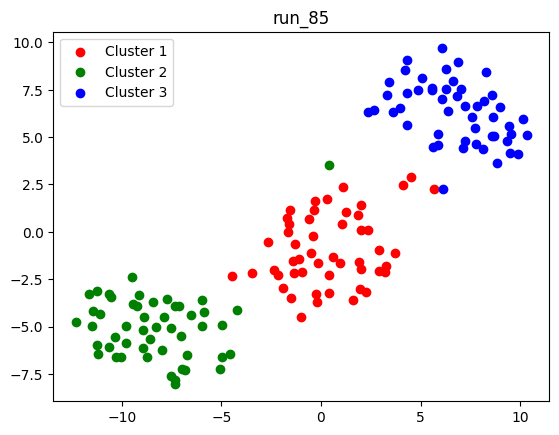

Run 86: Silhouette Coefficient = 0.6267566325699546


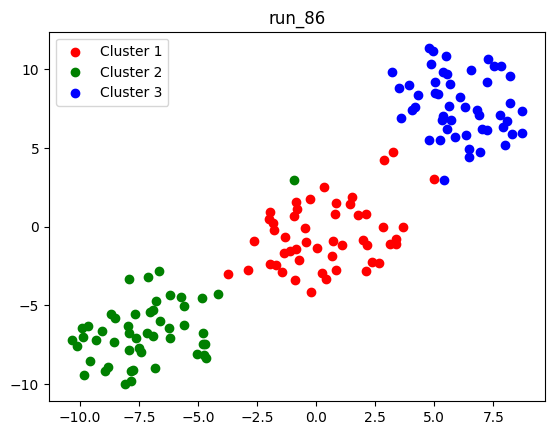

Run 87: Silhouette Coefficient = 0.6351555599878069


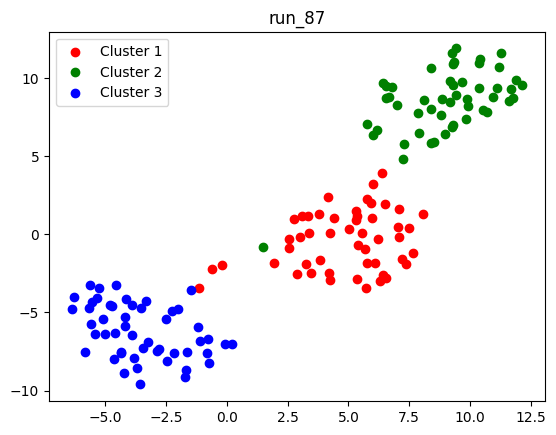

Run 88: Silhouette Coefficient = 0.629703844643849


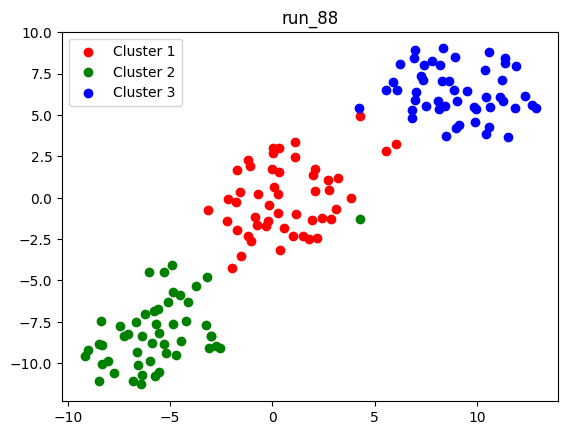

Run 89: Silhouette Coefficient = 0.629122298623279


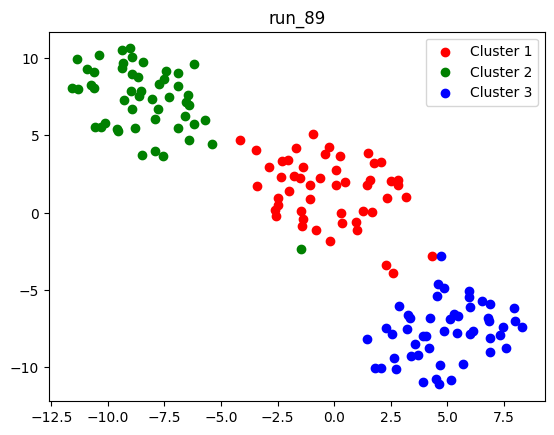

Run 90: Silhouette Coefficient = 0.6242777899881768


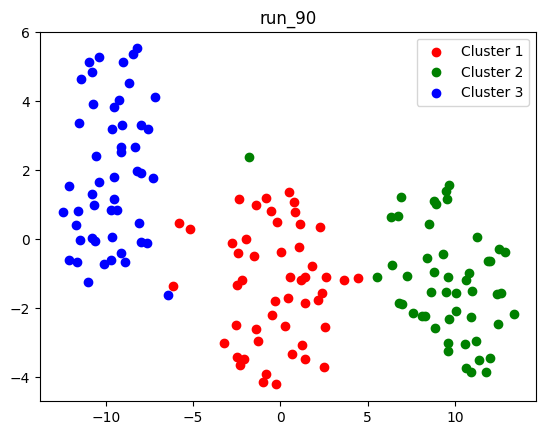

Run 91: Silhouette Coefficient = 0.6251712247612637


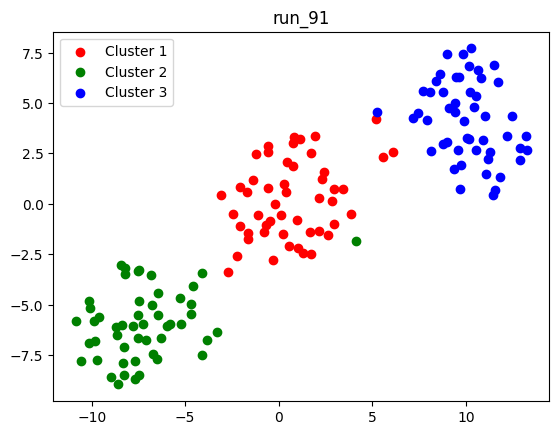

Run 92: Silhouette Coefficient = 0.6058372802528473


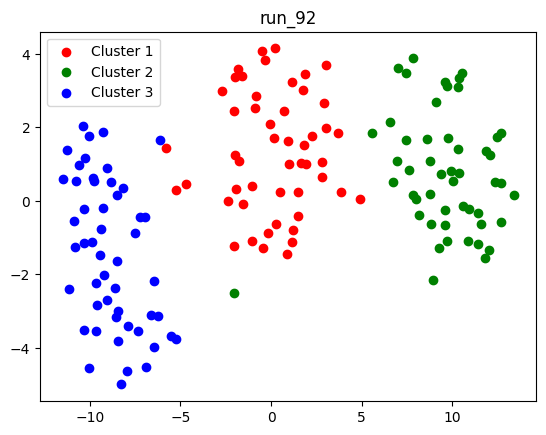

Run 93: Silhouette Coefficient = 0.6220780778198421


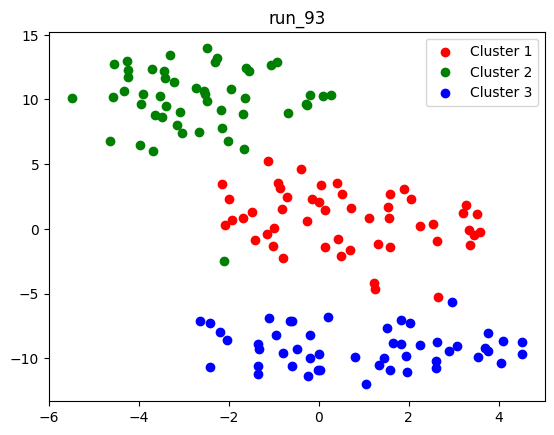

Run 94: Silhouette Coefficient = 0.604467078076707


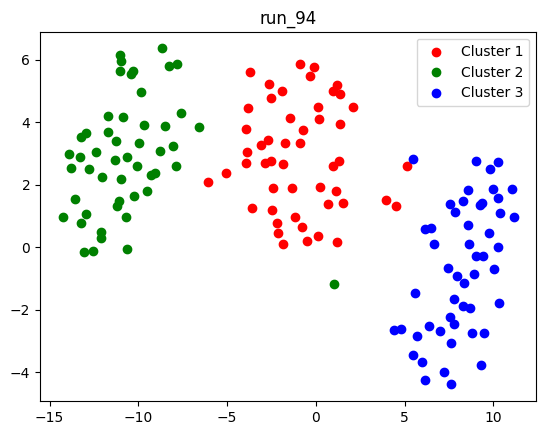

Run 95: Silhouette Coefficient = 0.6260234336615502


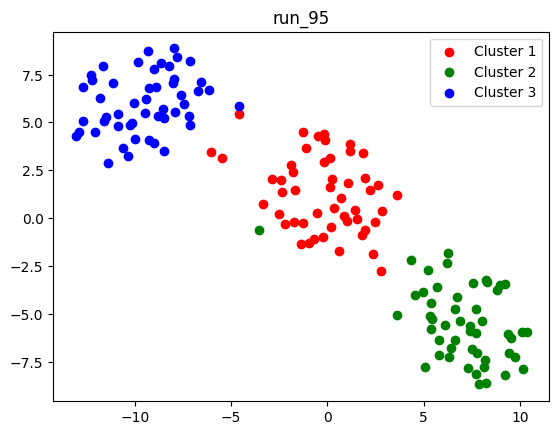

Run 96: Silhouette Coefficient = 0.6203676997804428


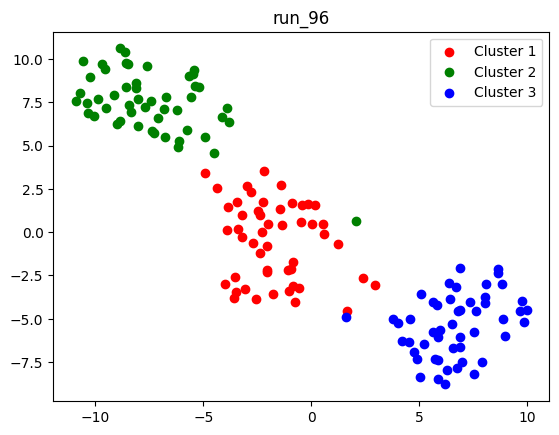

Run 97: Silhouette Coefficient = 0.6280309224699018


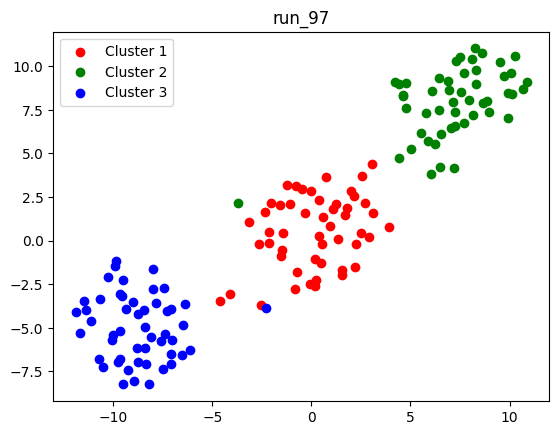

Run 98: Silhouette Coefficient = 0.6249084188309131


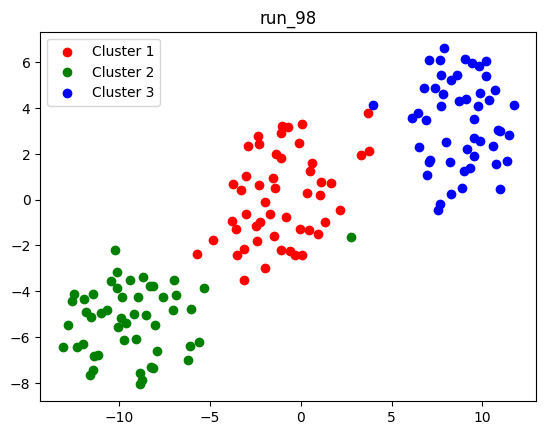

Run 99: Silhouette Coefficient = 0.6226398248513868


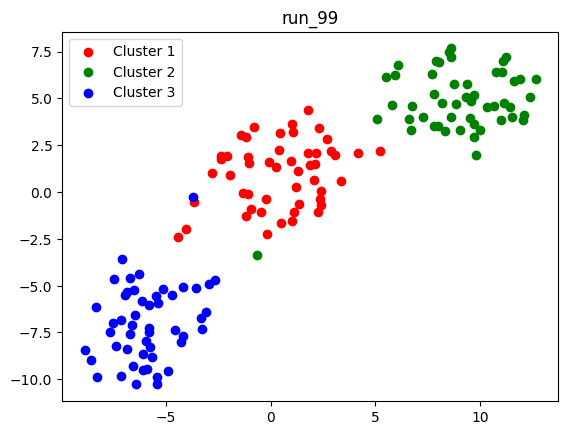

Run 100: Silhouette Coefficient = 0.6177342369329473


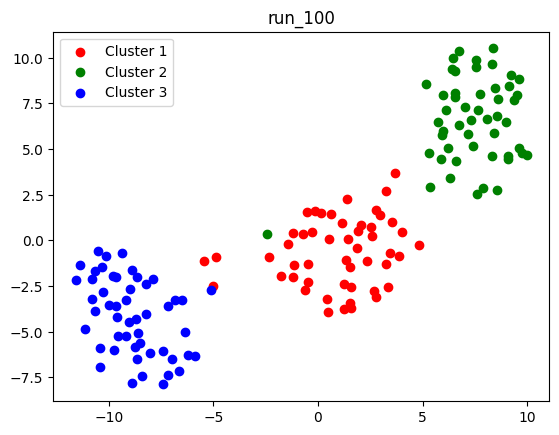

Run 101: Silhouette Coefficient = 0.6331583198366871


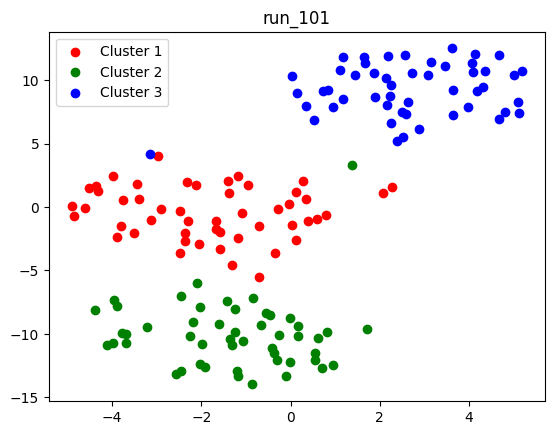

Run 102: Silhouette Coefficient = 0.6141179048389824


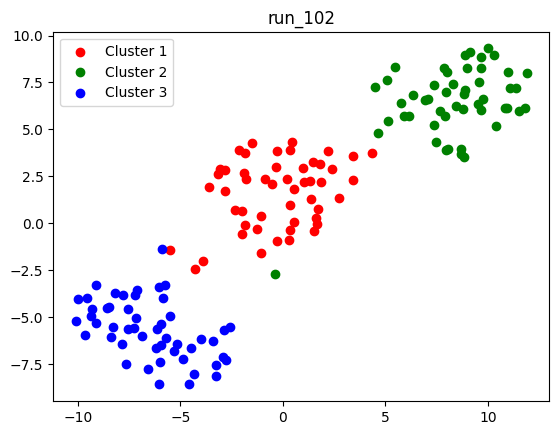

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.metrics import silhouette_score

n_results = 200
perplexity_res = 30
n_samples = 150
n_components = 2

for i in range(n_results):
    init = np.random.normal(loc=0, scale=1, size=(n_samples, n_components))
    tsne = manifold.TSNE(
        n_components=n_components,
        init=init,
        random_state=i,
        perplexity=perplexity_res,
        n_iter=2000,
    )
    Y = tsne.fit_transform(X)
    res = np.hstack((init, Y))
    res_df = pd.DataFrame(res, columns=["init_x", "init_y", "result_x", "result_y"])

    # Compute silhouette score
    silhouette_avg = silhouette_score(Y, y)
    print(f"Run {i}: Silhouette Coefficient = {silhouette_avg}")

    # Plotting
    plt.scatter(Y[y == 0, 0], Y[y == 0, 1], c="r", label="Cluster 1")
    plt.scatter(Y[y == 1, 0], Y[y == 1, 1], c="g", label="Cluster 2")
    plt.scatter(Y[y == 2, 0], Y[y == 2, 1], c="blue", label="Cluster 3")
    plt.title(f"run_{i}")
    plt.axis("tight")
    plt.legend()
    plt.show()

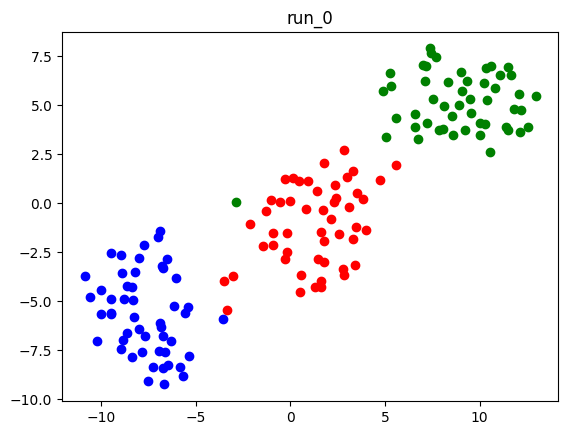

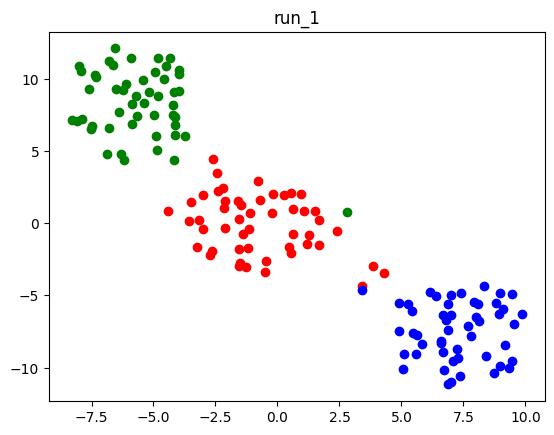

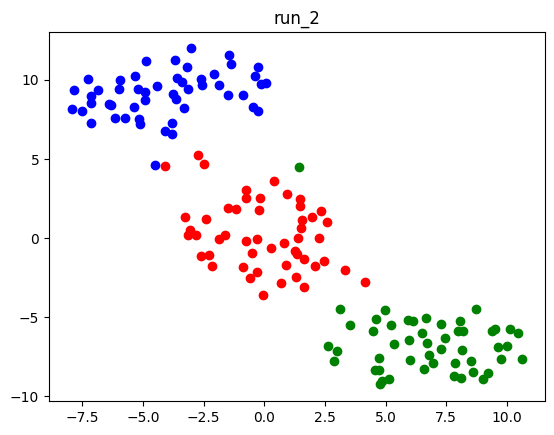

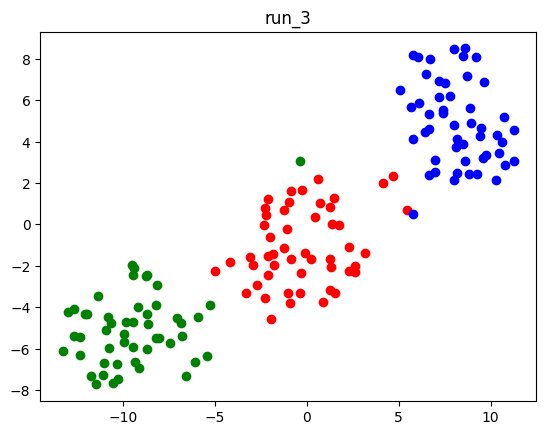

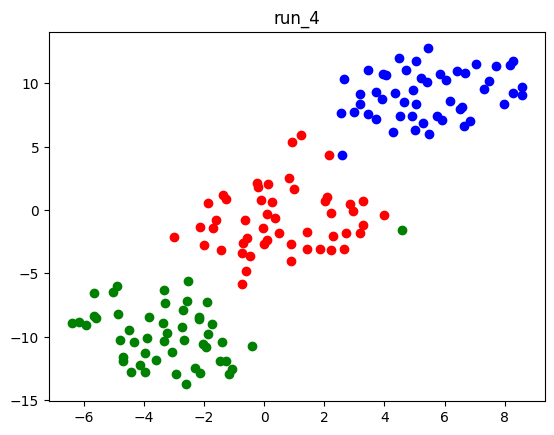

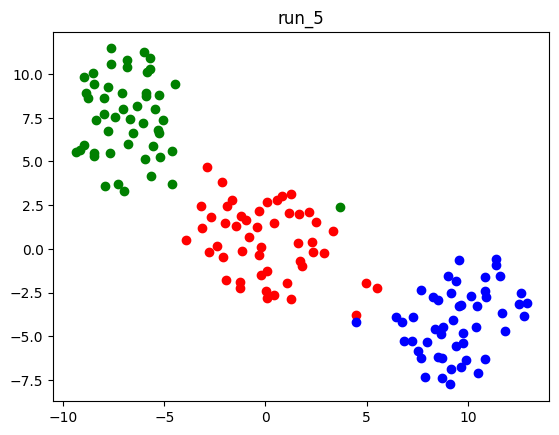

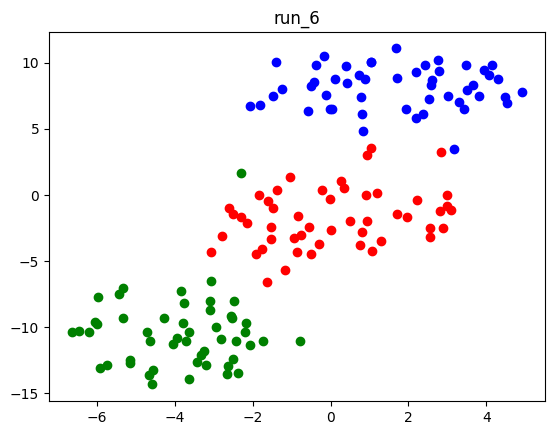

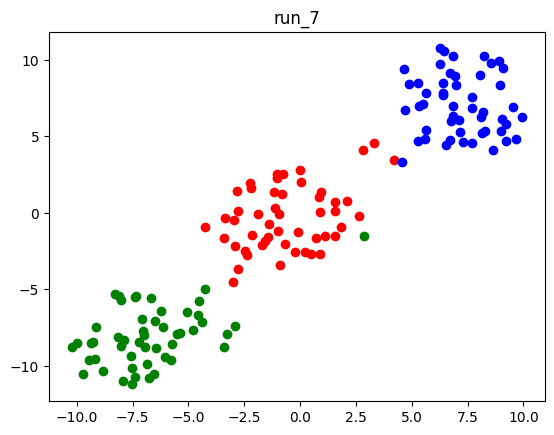

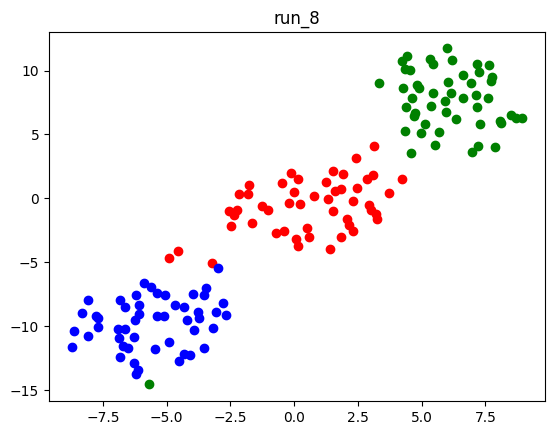

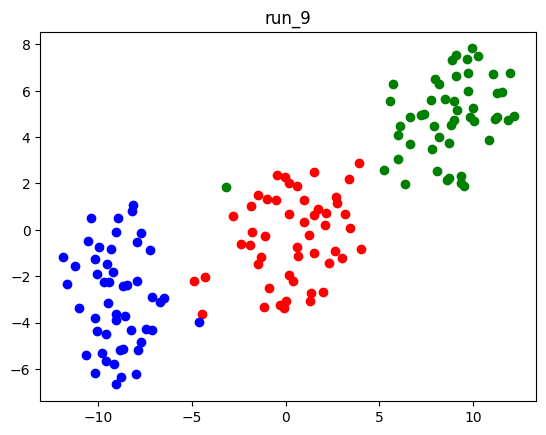

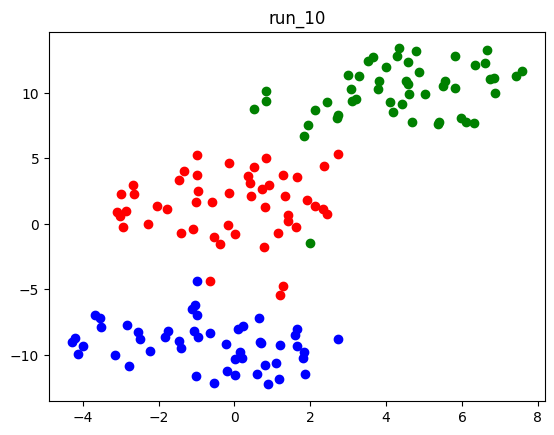

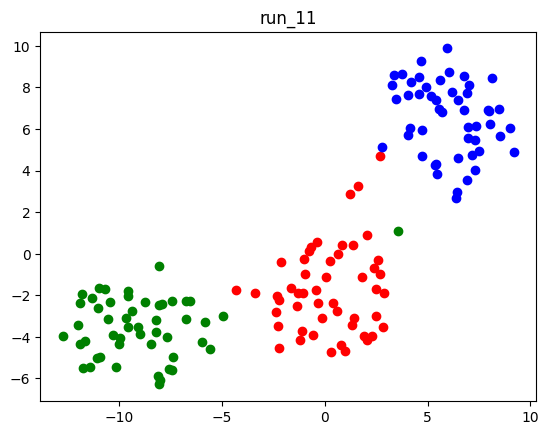

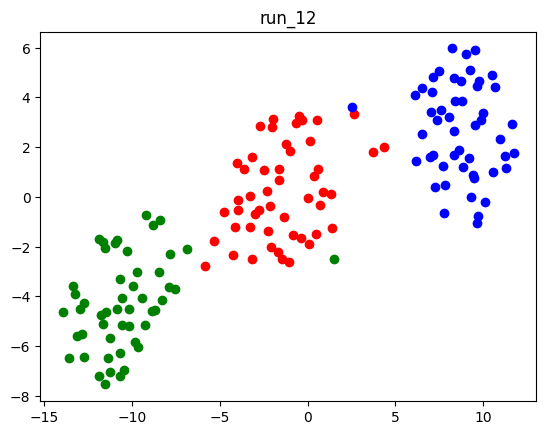

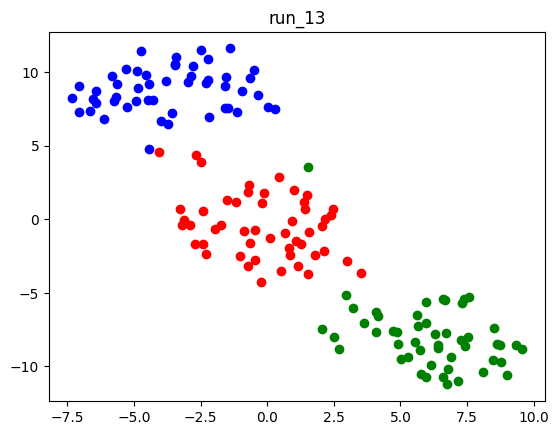

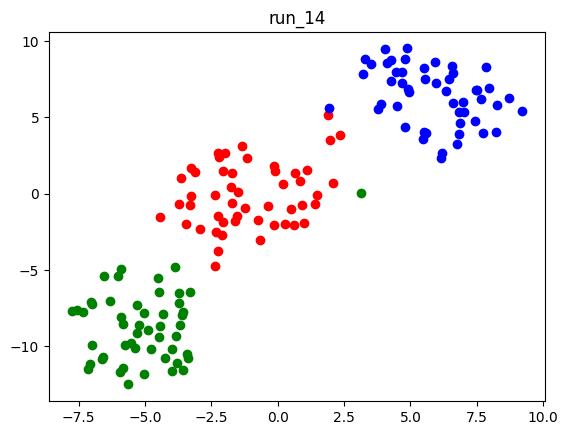

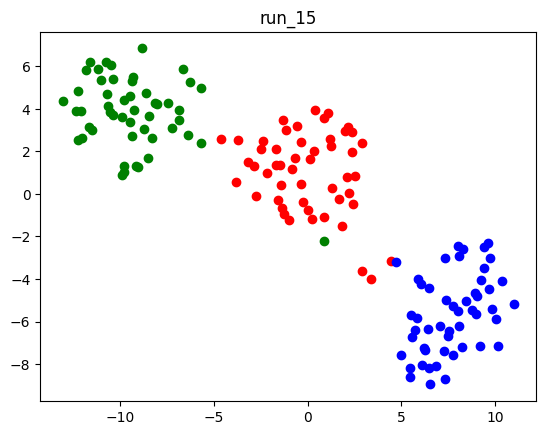

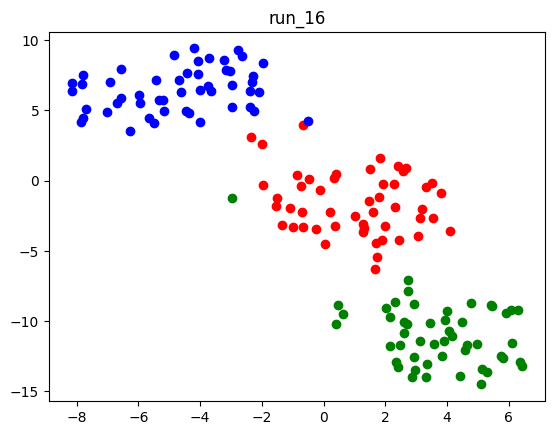

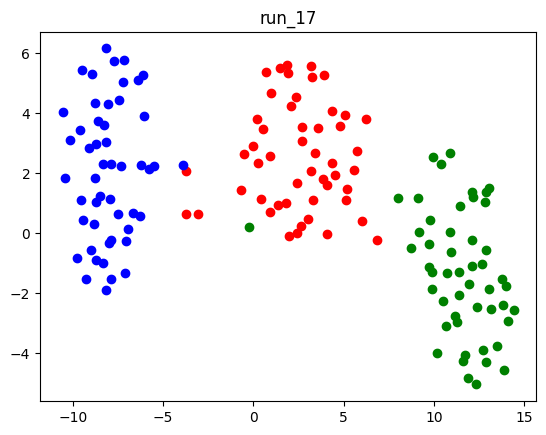

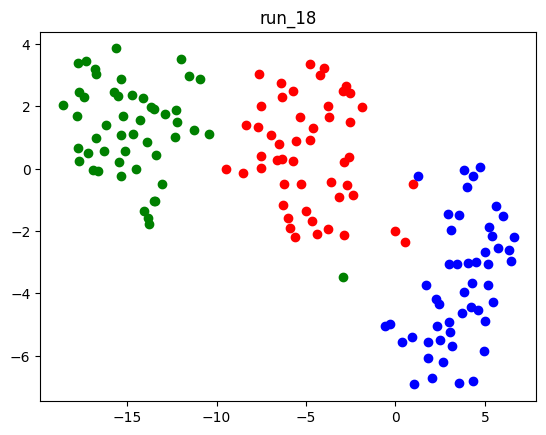

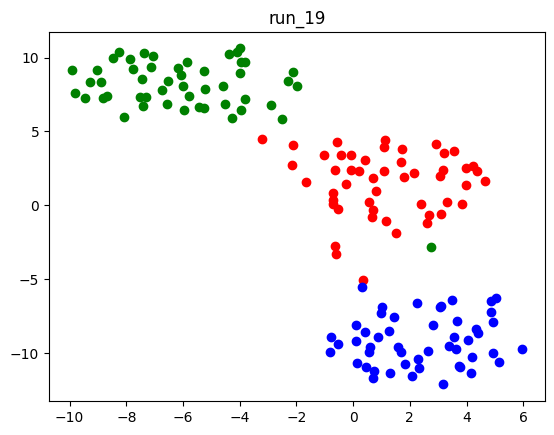

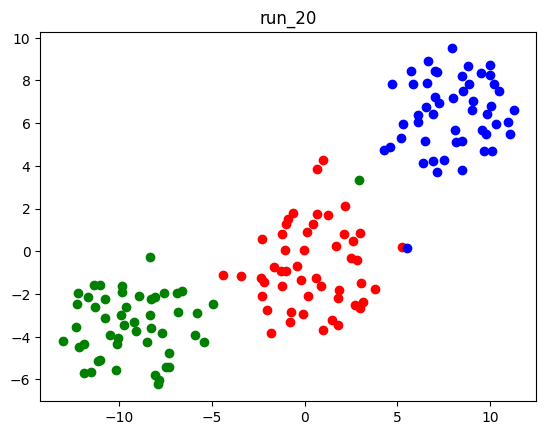

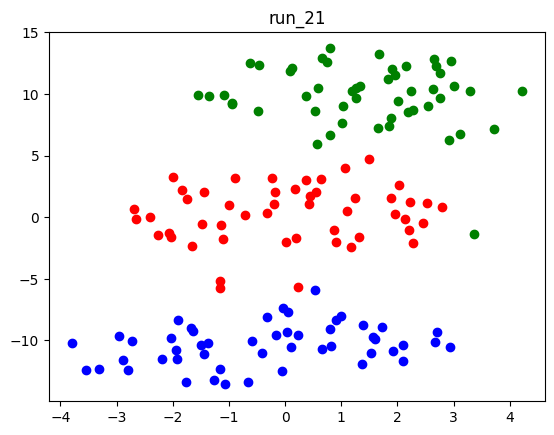

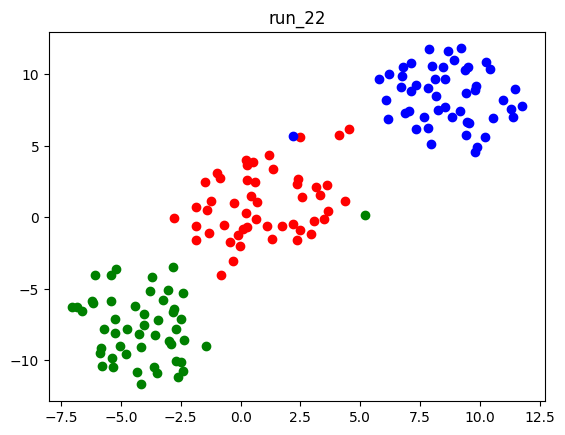

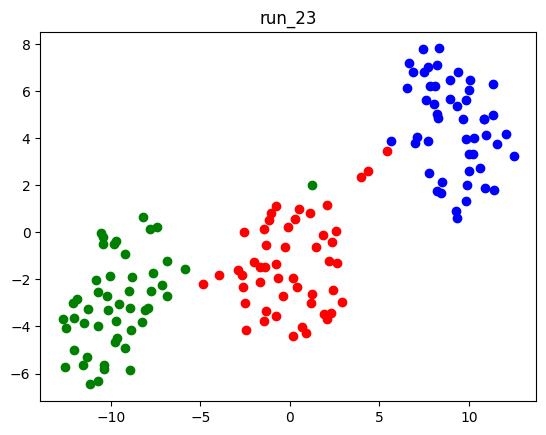

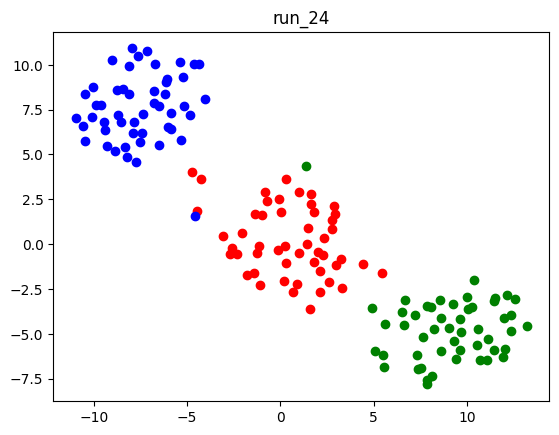

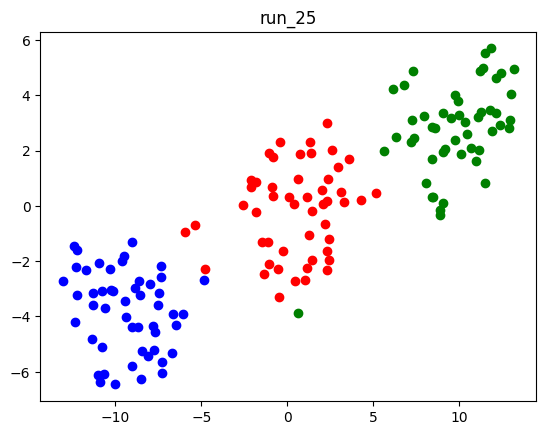

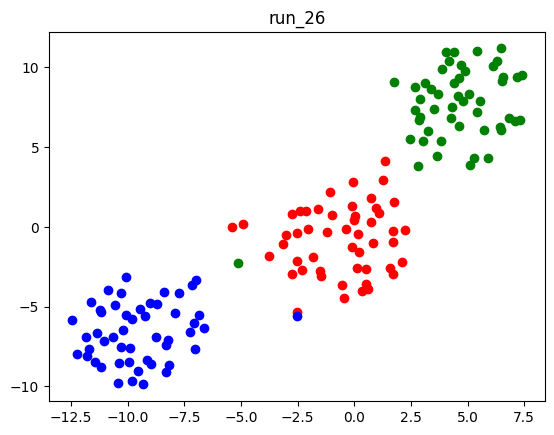

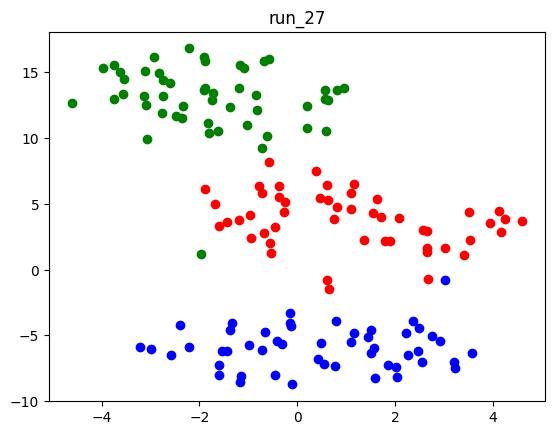

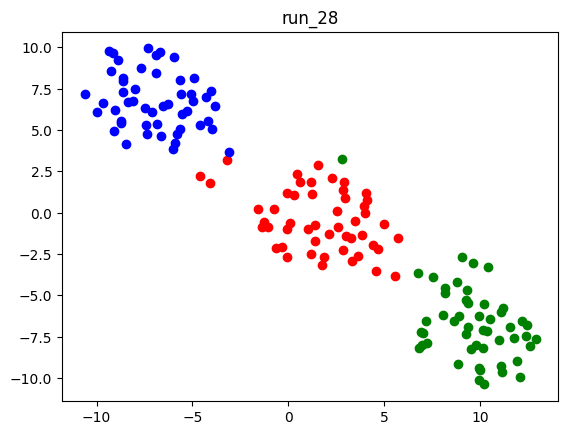

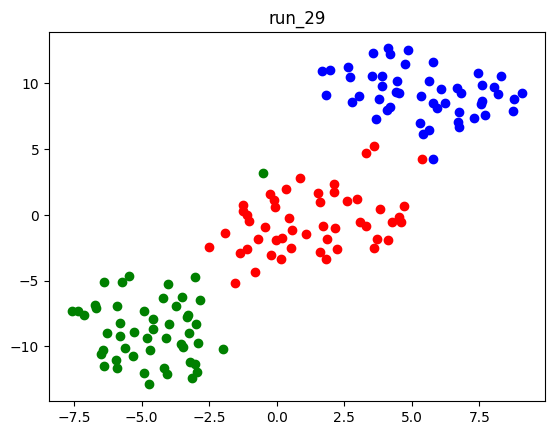

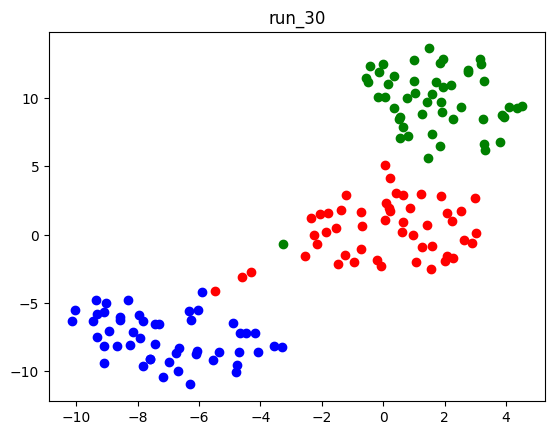

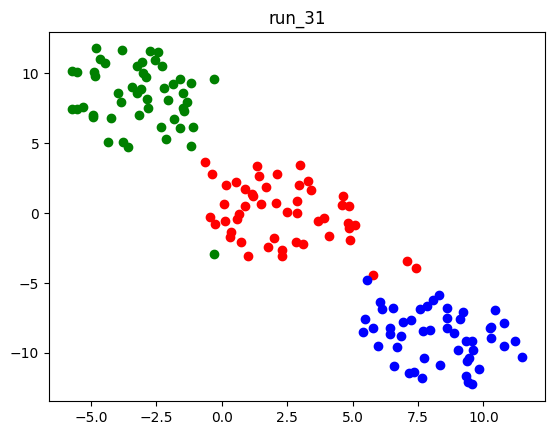

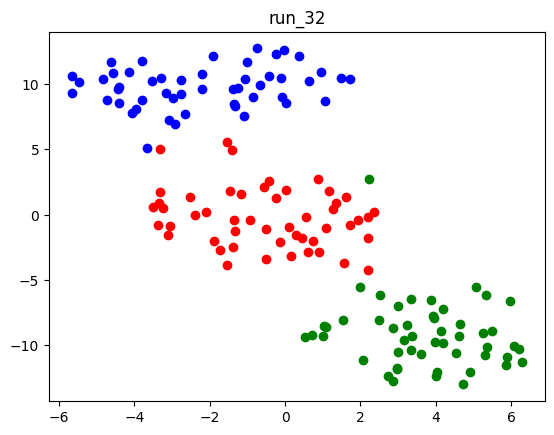

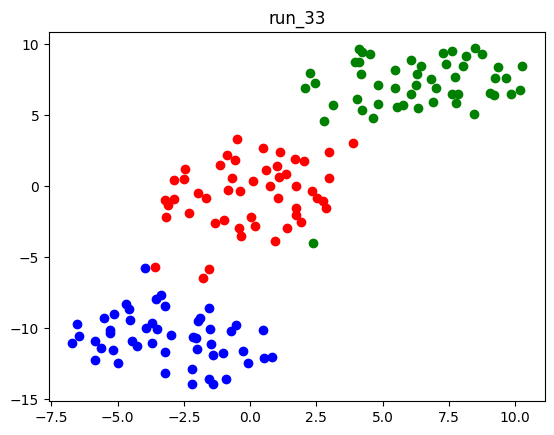

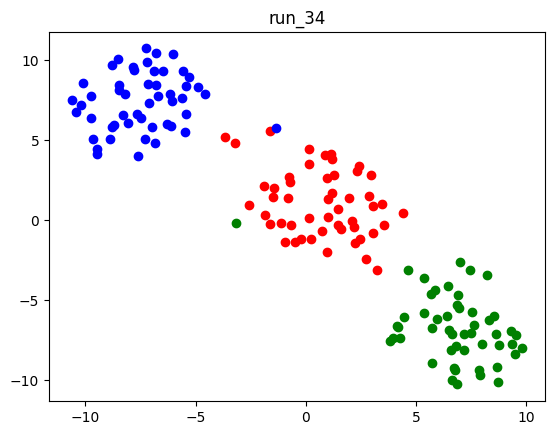

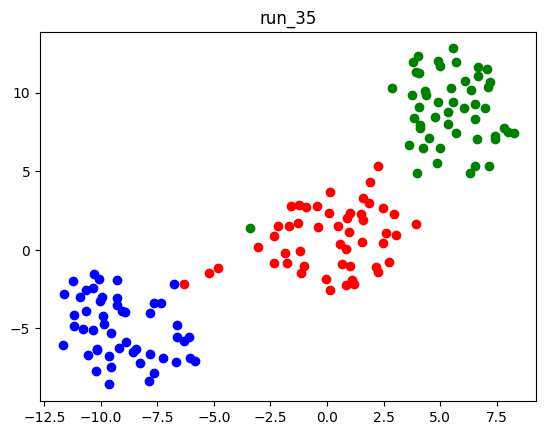

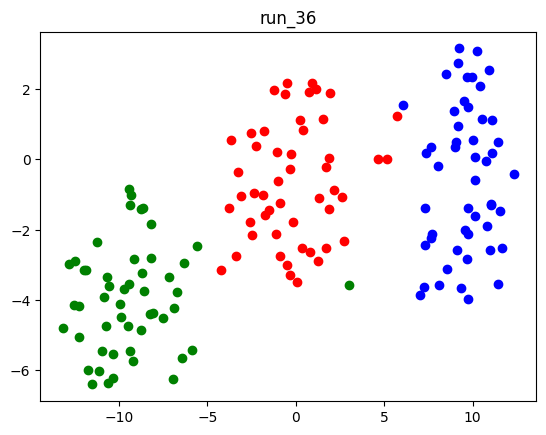

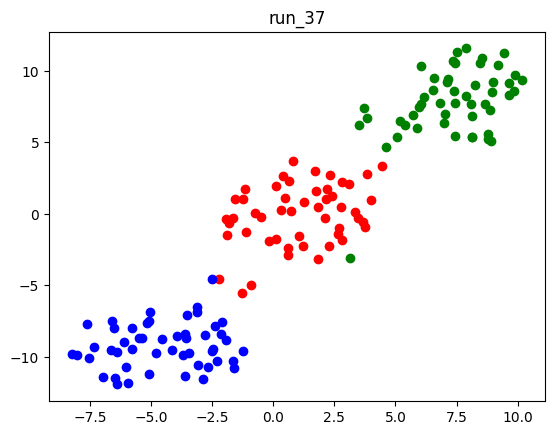

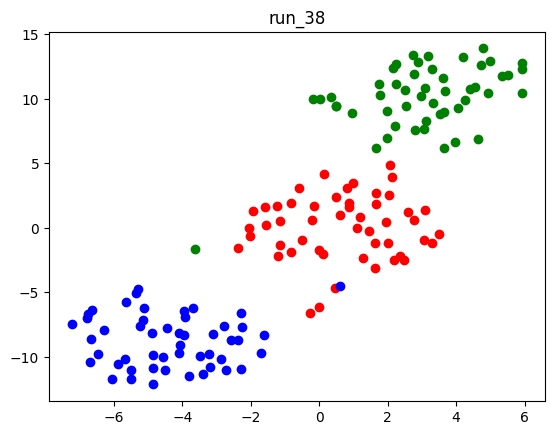

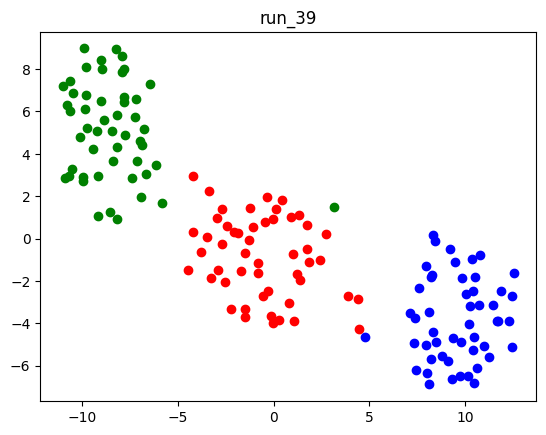

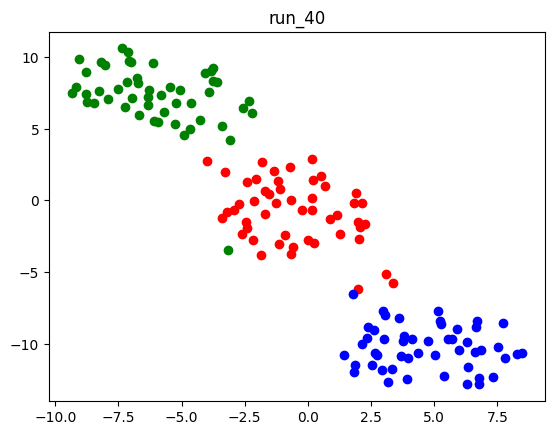

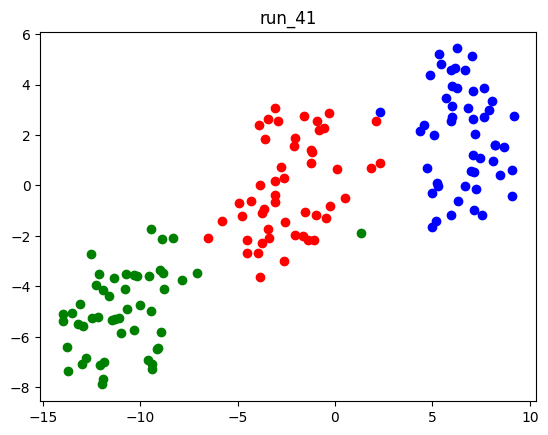

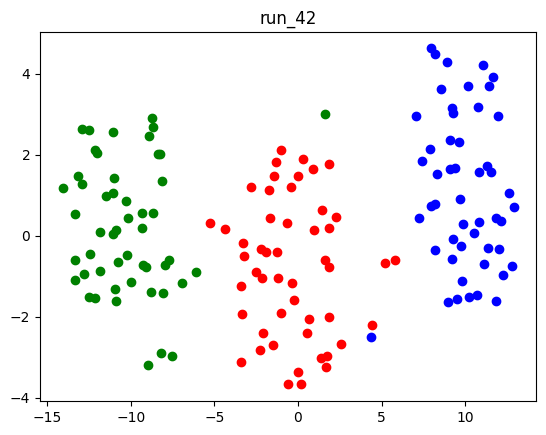

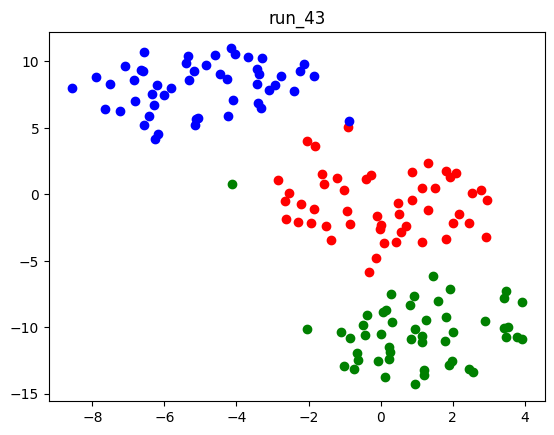

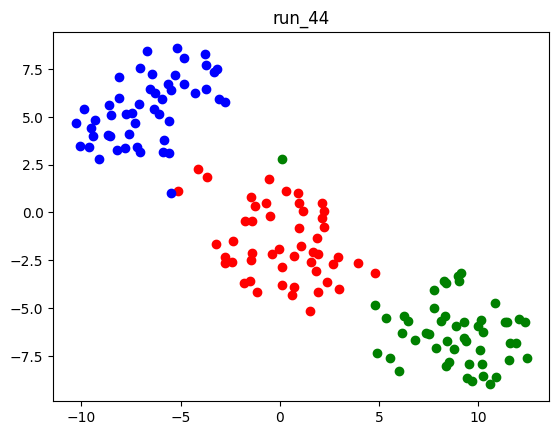

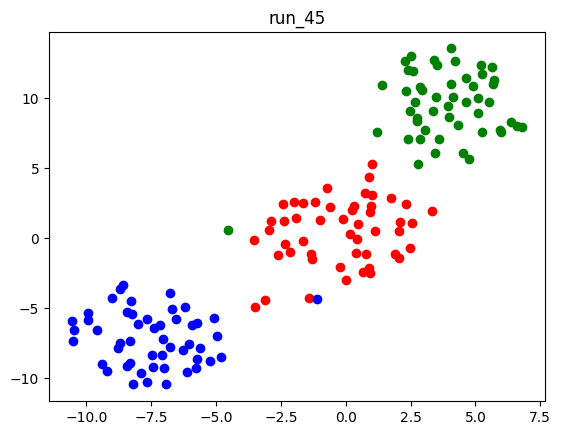

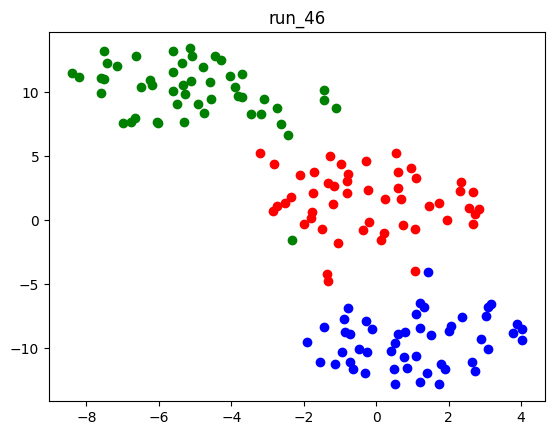

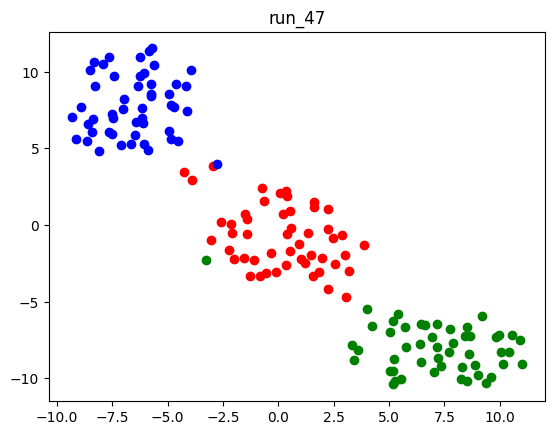

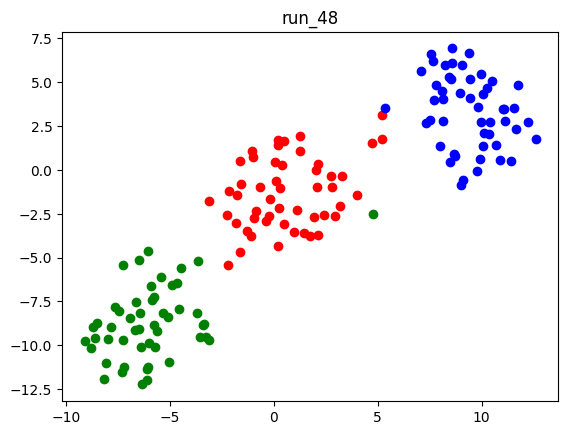

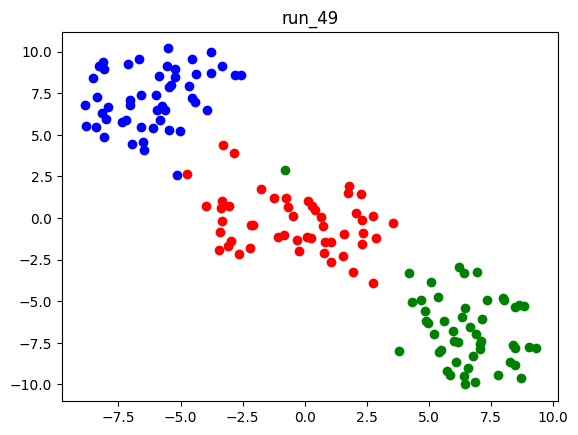

KeyboardInterrupt: 

In [ ]:
n_results = 200
perplexity_res = 30
n_samples = 150
n_components = 2
for i in range (n_results):
  init = np.random.normal(loc=0, scale=1, size=(n_samples, n_components))
  tsne = manifold.TSNE(
        n_components=n_components,
        init=init,
        random_state=i,
        perplexity=perplexity_res,
        n_iter=2000,
    )
  Y = tsne.fit_transform(X)
  res = np.hstack((init,Y))
  res_df = pd.DataFrame(res,columns = ["init_x","init_y","result_x","result_y"])
  #res_df.to_csv(f"/content/drive/MyDrive/TSNE RESULTS/BLOBS/run_{i}.csv",index = False)
  plt.scatter(Y[red, 0], Y[red, 1], c="r")
  plt.scatter(Y[green, 0], Y[green, 1], c="g")
  plt.scatter(Y[blue, 0], Y[blue, 1], c="blue")
  plt.title(f"run_{i}")
  plt.axis("tight")

  plt.show()


#Classification Problem

In [ ]:
n_samples = 600
n_features = 20
n_informative = 3
random_state = 5
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 3))
perplexities = [5, 30, 50, 100]
X, y = datasets.make_classification(n_samples=n_samples, n_features = n_features,\
                                    n_informative = n_informative, n_classes = 4,\
                                    class_sep = 2)
red = y == 0
green = y == 1
blue = y==2
purple = y==3

ax = subplots[0]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
ax.scatter(X_pca[red,0],X_pca[red,1],c="r")
ax.scatter(X_pca[green,0],X_pca[green,1],c="g")
ax.scatter(X_pca[blue,0],X_pca[blue,1],c="b")
ax.scatter(X_pca[purple,0],X_pca[purple,1],c="purple")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_title("Original")
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="pca",
        random_state=random_state,
        perplexity=perplexity,
        n_iter=2000,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("classification problem, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="blue")
    ax.scatter(Y[purple, 0], Y[purple, 1], c="purple")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

Setting perplexity = 30

In [ ]:
n_results = 200
perplexity_res = 30
n_samples = 600
for i in range (n_results):
  init = np.random.normal(loc=0, scale=1, size=(n_samples, n_components))
  tsne = manifold.TSNE(
        n_components=n_components,
        init=init,
        random_state=i,
        perplexity=perplexity_res,
        n_iter=2000,
    )
  Y = tsne.fit_transform(X)
  res = np.hstack((init,Y))
  res_df = pd.DataFrame(res,columns = ["init_x","init_y","result_x","result_y"])
  res_df.to_csv(f"/content/drive/MyDrive/TSNE RESULTS/CLASSIFICATION_PROBLEM/run_{i}.csv",index = False)
  plt.scatter(Y[red, 0], Y[red, 1], c="r")
  plt.scatter(Y[green, 0], Y[green, 1], c="g")
  plt.scatter(Y[blue, 0], Y[blue, 1], c="blue")
  plt.scatter(Y[purple, 0], Y[purple, 1], c="purple")
  plt.title(f"run_{i}")
  plt.axis("tight")

  plt.show()


# GAN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator
latent_dim = # Size of the latent space

# Input for random noise
noise_input = layers.Input(shape=(latent_dim,))

# Input for variable-sized probability distribution
prob_dist_input = layers.Input(shape=(None,))  # None allows for dynamic size

# Concatenate the noise and probability distribution inputs
concatenated_inputs = layers.concatenate([noise_input, prob_dist_input], axis=-1)

generator = models.Sequential([
    layers.InputLayer(input_tensor=concatenated_inputs),  # Use the concatenated input
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(output_dim, activation='sigmoid')  # Adjust output_dim according to your data
])

# Define the discriminator
discriminator = models.Sequential([
    layers.InputLayer(input_shape=(output_dim,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Combine generator and discriminator into a GAN
discriminator.trainable = False
gan = models.Sequential([generator, discriminator])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile GAN
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='adam')

# VAE

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses

# Define the encoder
latent_dim = # Size of the latent space

# Input for variable-sized probability distribution
prob_dist_input = layers.Input(shape=(None,))  # None allows for dynamic size

encoder_inputs = tf.keras.Input(shape=(None,))  # Variable input dimension
x = layers.Dense(256, activation='relu')(encoder_inputs)

# Combine the probability distribution input with the encoded features
x = layers.concatenate([x, prob_dist_input], axis=-1)

z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Define the sampling layer
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Define the decoder
decoder_inputs = layers.Input(shape=(None, latent_dim))  # None allows variable batch sizes
x = layers.Dense(256, activation='relu')(decoder_inputs)
outputs = layers.Dense(input_dim, activation='sigmoid')(x)

# Build and compile the VAE model
encoder = models.Model([encoder_inputs, prob_dist_input], [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, outputs, name='decoder')

vae_inputs = [encoder_inputs, prob_dist_input]
vae_outputs = decoder([encoder(vae_inputs)[2], prob_dist_input])
vae = models.Model(vae_inputs, vae_outputs, name='vae')

# Define the loss function
xent_loss = input_dim * losses.binary_crossentropy(vae_inputs[0], vae_outputs)
kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
vae_loss = tf.reduce_mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Circles Test